# Import Libraries

In [1]:
import pandas as pd
import numpy as np

import regex as re 
import string
import nltk
import datetime


from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
stopwords_eng = stopwords.words("english")
from nltk.corpus import wordnet


!pip install wordcloud
from wordcloud import WordCloud
import seaborn as sns

!pip install autocorrect
from autocorrect import Speller
spell = Speller()

# import tqdm for progress bars
from tqdm import tqdm

import warnings
warnings.filterwarnings("ignore")

## Import csv files

In [2]:
altcoin_df = pd.read_csv("altcoin.csv") 
appl_df = pd.read_csv("APPL.csv") 
bitcoin_df = pd.read_csv("bitcoin.csv") 
coindesk_df = pd.read_csv("coindesk.csv") 
crypto_df = pd.read_csv("Cryptocurrency.csv") 
gold_df = pd.read_csv("Gold.csv") 
goog_df = pd.read_csv("GOOG.csv") 
yhoo_df = pd.read_csv("YHOO.csv") 

### Check first few rows and shape of each dataframe

In [3]:
altcoin_df.head()

Datetime             Tweet Id  \
0  2023-03-10 23:58:29+00:00  1634342993812414464   
1  2023-03-10 23:58:19+00:00  1634342954755313664   
2  2023-03-10 23:57:48+00:00  1634342825465708545   
3  2023-03-10 23:57:48+00:00  1634342821837811712   
4  2023-03-10 23:57:40+00:00  1634342788518248448   

                                                Text  \
0  #Ethereum price update: \n\n#ETH $1430.93 USD\...   
1  @Altcoin_Gems_ @Lotto_Arb Wow, this is Fstasti...   
2                        @Altcoin_Gold Missing $DSLA   
3          @Altcoin_Gems_ @Lotto_Arb Wow interesting   
4  @TreatsBot $paw #paw #altcoin #memecoins https...   

                                                 URL  \
0  https://twitter.com/0xEthereumYoda/status/1634...   
1  https://twitter.com/missufee1410213/status/163...   
2  https://twitter.com/migueldiz0n/status/1634342...   
3  https://twitter.com/Hanitzy_/status/1634342821...   
4  https://twitter.com/RifainAP/status/1634342788...   

                                  User  
0   https://twitter.com/0xEthereumYoda  
1  https://twitter.com/missufee1410213  
2      https://twitter.com/migueldiz0n  
3         https://twitter.com/Hanitzy_  
4         https://twitter.com/RifainAP

In [4]:
altcoin_df.shape

(5001, 5)

In [5]:
appl_df.head()

Datetime             Tweet Id  \
0  2023-03-10 23:57:59+00:00  1634342869036064769   
1  2023-03-10 23:55:02+00:00  1634342129706123265   
2  2023-03-10 23:50:12+00:00  1634340909276971011   
3  2023-03-10 23:46:57+00:00  1634340095376384006   
4  2023-03-10 23:44:23+00:00  1634339445808955392   

                                                Text  \
0  @AndersonAfDMdEP @P_McCulloughMD 🙏🏻❤️ @CaudeHe...   
1  @RMogyorosy So ist das. \nhttps://t.co/hkG5J6Dgnh   
2  FROM RUSSIA WITH LOVE (GAMECUBE): \n\nGreat fu...   
3  dannylux le fue infiel a su novia, ya no creo ...   
4  『元気いっぱいチーズちゃん💕🍀🐶🐾』 - わんこにゃんこ☺️（ミクチャ公認）さんがLIVE配...   

                                                 URL  \
0  https://twitter.com/SabineWalkerNo2/status/163...   
1  https://twitter.com/Appl_am_Apple/status/16343...   
2  https://twitter.com/GargantuanAppl1/status/163...   
3  https://twitter.com/appl3juic3e/status/1634340...   
4  https://twitter.com/TheScragglyAppl/status/163...   

                                  User  
0  https://twitter.com/SabineWalkerNo2  
1    https://twitter.com/Appl_am_Apple  
2  https://twitter.com/GargantuanAppl1  
3      https://twitter.com/appl3juic3e  
4  https://twitter.com/TheScragglyAppl

In [6]:
appl_df.shape

(3181, 5)

In [7]:
bitcoin_df.head()

Datetime             Tweet Id  \
0  2023-03-10 23:59:59+00:00  1634343374231674881   
1  2023-03-10 23:59:59+00:00  1634343373019533313   
2  2023-03-10 23:59:58+00:00  1634343371123617792   
3  2023-03-10 23:59:58+00:00  1634343368187604992   
4  2023-03-10 23:59:57+00:00  1634343364941209601   

                                                Text  \
0  we are in accumulation phase don't get shake o...   
1  👋 Hello #Bitcoin enthusiasts! With recent mark...   
2  @Moeez_LC Proper enjoying watching this blow u...   
3                            https://t.co/Ei0LDaIpsS   
4  @TobiWien @coinbase @brian_armstrong https://t...   

                                                 URL  \
0  https://twitter.com/bitcoinUPs/status/16343433...   
1  https://twitter.com/mamorudigital/status/16343...   
2  https://twitter.com/BitcoinBikerUK/status/1634...   
3  https://twitter.com/BitcoinFeniks/status/16343...   
4  https://twitter.com/BitcoinNewsCom/status/1634...   

                                 User  
0      https://twitter.com/bitcoinUPs  
1   https://twitter.com/mamorudigital  
2  https://twitter.com/BitcoinBikerUK  
3   https://twitter.com/BitcoinFeniks  
4  https://twitter.com/BitcoinNewsCom

In [8]:
bitcoin_df.shape

(5001, 5)

In [9]:
coindesk_df.head()

Datetime             Tweet Id  \
0  2023-03-10 23:57:18+00:00  1634342698005024771   
1  2023-03-10 23:57:05+00:00  1634342642879193088   
2  2023-03-10 23:54:30+00:00  1634341992531390464   
3  2023-03-10 23:53:07+00:00  1634341646015012867   
4  2023-03-10 23:50:57+00:00  1634341100327677953   

                                                Text  \
0  #SVB $SI Crypto Wallets Withdraw $902M USDC Fr...   
1  https://t.co/pUTRb8suUS Meta, text-based decen...   
2  @phil_geiger @xy_z2k @CoinDesk @sndr_krisztian...   
3                    @CoinDesk @sndr_krisztian Fudge   
4  @CoinDesk @sndr_krisztian I JUST saw a Circle ...   

                                                 URL  \
0  https://twitter.com/chaconconsultor/status/163...   
1  https://twitter.com/binarymoves/status/1634342...   
2  https://twitter.com/zenquester/status/16343419...   
3  https://twitter.com/TEQNiKG/status/16343416460...   
4  https://twitter.com/ExpectedGoals_/status/1634...   

                                  User  
0  https://twitter.com/chaconconsultor  
1      https://twitter.com/binarymoves  
2       https://twitter.com/zenquester  
3          https://twitter.com/TEQNiKG  
4   https://twitter.com/ExpectedGoals_

In [10]:
coindesk_df.shape

(5001, 5)

In [11]:
crypto_df.head()

Datetime             Tweet Id  \
0  2023-03-10 23:59:34+00:00  1634343269751570433   
1  2023-03-10 23:59:17+00:00  1634343195340414976   
2  2023-03-10 23:59:12+00:00  1634343176008769537   
3  2023-03-10 23:58:29+00:00  1634342993812414464   
4  2023-03-10 23:58:11+00:00  1634342920042979328   

                                                Text  \
0  Have you noticed that the independent bitcoin ...   
1  Weekly RIP #TERA2. Headed to the dirt where it...   
2  Cryptos Gainer/Loser at 2023-03-10 - #DREP +27...   
3  #Ethereum price update: \n\n#ETH $1430.93 USD\...   
4  Digital wallet-based Liminal secures CryptoCur...   

                                                 URL  \
0  https://twitter.com/EddieW11/status/1634343269...   
1  https://twitter.com/fud_crown/status/163434319...   
2  https://twitter.com/Titdoidotcom/status/163434...   
3  https://twitter.com/0xEthereumYoda/status/1634...   
4  https://twitter.com/cryptonewz_io/status/16343...   

                                 User  
0        https://twitter.com/EddieW11  
1       https://twitter.com/fud_crown  
2    https://twitter.com/Titdoidotcom  
3  https://twitter.com/0xEthereumYoda  
4   https://twitter.com/cryptonewz_io

In [12]:
crypto_df.shape

(5001, 5)

In [13]:
gold_df.head()

Datetime             Tweet Id  \
0  2023-03-10 23:59:59+00:00  1634343372654534657   
1  2023-03-10 23:59:58+00:00  1634343370435842049   
2  2023-03-10 23:59:57+00:00  1634343365000015872   
3  2023-03-10 23:59:57+00:00  1634343364605906944   
4  2023-03-10 23:59:56+00:00  1634343362550480896   

                                                Text  \
0  @ToroDeArena @ColMadr @petrogustavo Invertido ...   
1                               @Glittered_gold 🥰🥰🥰🥰   
2  @pedreiva also true\ni dont even know what a s...   
3  @dem_road @mhmck Money, money, money. There’s ...   
4  @zekibahce Ne oldu? Zoruna mi gitti? Cok mu ko...   

                                                 URL  \
0  https://twitter.com/AGHValora/status/163434337...   
1  https://twitter.com/Skarpi25/status/1634343370...   
2  https://twitter.com/GameInGold/status/16343433...   
3  https://twitter.com/SuzanneTime/status/1634343...   
4  https://twitter.com/OkanGoldStream/status/1634...   

                                 User  
0       https://twitter.com/AGHValora  
1        https://twitter.com/Skarpi25  
2      https://twitter.com/GameInGold  
3     https://twitter.com/SuzanneTime  
4  https://twitter.com/OkanGoldStream

In [14]:
gold_df.shape

(5001, 5)

In [15]:
goog_df.head()

Datetime             Tweet Id  \
0  2023-03-10 23:58:59+00:00  1634343120094593026   
1  2023-03-10 23:57:50+00:00  1634342831140610048   
2  2023-03-10 23:57:48+00:00  1634342823179722754   
3  2023-03-10 23:54:26+00:00  1634341977272745985   
4  2023-03-10 23:52:04+00:00  1634341381559730176   

                                                Text  \
0  @alangari519 اللهمَّ وفقنا لما تحب وترضى \nوار...   
1  @Yeribabaa She did justice to the questions be...   
2  My 10 Key Stocks Action Summary: Fri 3/10/23\n...   
3                                       Goog morning   
4  @G_JINGH @kevin_oku @Bolajuade Comrade… off mic 🎤   

                                                 URL  \
0  https://twitter.com/goog12021/status/163434312...   
1  https://twitter.com/memoizing/status/163434283...   
2  https://twitter.com/EquitySystems/status/16343...   
3  https://twitter.com/OxOvi99_Wins/status/163434...   
4  https://twitter.com/memoizing/status/163434138...   

                                User  
0      https://twitter.com/goog12021  
1      https://twitter.com/memoizing  
2  https://twitter.com/EquitySystems  
3   https://twitter.com/OxOvi99_Wins  
4      https://twitter.com/memoizing

In [16]:
goog_df.shape

(5001, 5)

In [17]:
yhoo_df.head()

Datetime             Tweet Id  \
0  2023-03-10 23:55:37+00:00  1634342275139469313   
1  2023-03-10 23:53:26+00:00  1634341725614342145   
2  2023-03-10 23:52:29+00:00  1634341485624565760   
3  2023-03-10 23:49:17+00:00  1634340680955830274   
4  2023-03-10 23:48:29+00:00  1634340479092269056   

                                                Text  \
0    @Reneta237 He looks so much younger now yhoo 😍🥰   
1                @PakoCele @Phumzil89603005 😂😂😂 Yhoo   
2  My faves are the most prayerful sinners in tha...   
3  the last part. yhoo. money can get you out of ...   
4                         Yhoo Nana 😤😤😤🤣🤣🤣🤣#BBTitans   

                                                 URL  \
0  https://twitter.com/will_ziyanda/status/163434...   
1  https://twitter.com/_Mbalivalentine/status/163...   
2  https://twitter.com/c2bx75/status/163434148562...   
3  https://twitter.com/gingermaraj/status/1634340...   
4  https://twitter.com/MzuzwanaYamkela/status/163...   

                                  User  
0     https://twitter.com/will_ziyanda  
1  https://twitter.com/_Mbalivalentine  
2           https://twitter.com/c2bx75  
3      https://twitter.com/gingermaraj  
4  https://twitter.com/MzuzwanaYamkela

In [18]:
yhoo_df.shape

(3644, 5)

#### Here, it can be noticed that all dataframes have same features, so we can move forward to concatinating the data in axis=0 (row-wise) and we can further perform the EDA in the merged dataframe

### Concat Dataframes

In [19]:
trade_df = pd.concat([altcoin_df, appl_df, bitcoin_df, coindesk_df, crypto_df,
                     gold_df, goog_df, yhoo_df], axis=0)

In [20]:
trade_df.reset_index(drop=True, inplace=True)

# Saving DataFrame in CSV File 

In [21]:
trade_df.to_csv('trade_df.csv', index=False)  

## Exploratory Data Analysis (EDA)

In [22]:
trade_df.shape

(36831, 5)

In [23]:
trade_df.head()

Datetime             Tweet Id  \
0  2023-03-10 23:58:29+00:00  1634342993812414464   
1  2023-03-10 23:58:19+00:00  1634342954755313664   
2  2023-03-10 23:57:48+00:00  1634342825465708545   
3  2023-03-10 23:57:48+00:00  1634342821837811712   
4  2023-03-10 23:57:40+00:00  1634342788518248448   

                                                Text  \
0  #Ethereum price update: \n\n#ETH $1430.93 USD\...   
1  @Altcoin_Gems_ @Lotto_Arb Wow, this is Fstasti...   
2                        @Altcoin_Gold Missing $DSLA   
3          @Altcoin_Gems_ @Lotto_Arb Wow interesting   
4  @TreatsBot $paw #paw #altcoin #memecoins https...   

                                                 URL  \
0  https://twitter.com/0xEthereumYoda/status/1634...   
1  https://twitter.com/missufee1410213/status/163...   
2  https://twitter.com/migueldiz0n/status/1634342...   
3  https://twitter.com/Hanitzy_/status/1634342821...   
4  https://twitter.com/RifainAP/status/1634342788...   

                                  User  
0   https://twitter.com/0xEthereumYoda  
1  https://twitter.com/missufee1410213  
2      https://twitter.com/migueldiz0n  
3         https://twitter.com/Hanitzy_  
4         https://twitter.com/RifainAP

#### Get information of the dataframe columns

In [24]:
trade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36831 entries, 0 to 36830
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Datetime  36831 non-null  object
 1   Tweet Id  36831 non-null  int64 
 2   Text      36831 non-null  object
 3   URL       36831 non-null  object
 4   User      36831 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.4+ MB


**Datetime column is of type object, so we need to convert that into datetime**

In [25]:
trade_df['Datetime'] = trade_df['Datetime'].astype('datetime64')

In [26]:
trade_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36831 entries, 0 to 36830
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Datetime  36831 non-null  datetime64[ns]
 1   Tweet Id  36831 non-null  int64         
 2   Text      36831 non-null  object        
 3   URL       36831 non-null  object        
 4   User      36831 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 1.4+ MB


In [27]:
trade_df['Tweet Id'][:5]

0    1634342993812414464
1    1634342954755313664
2    1634342825465708545
3    1634342821837811712
4    1634342788518248448
Name: Tweet Id, dtype: int64

In [28]:
trade_df.duplicated(keep='first').sum()

460

In [29]:
trade_df[trade_df['Tweet Id']==1634342993812414464]

Datetime             Tweet Id  \
0     2023-03-10 23:58:29  1634342993812414464   
8248  2023-03-10 23:58:29  1634342993812414464   
18187 2023-03-10 23:58:29  1634342993812414464   

                                                    Text  \
0      #Ethereum price update: \n\n#ETH $1430.93 USD\...   
8248   #Ethereum price update: \n\n#ETH $1430.93 USD\...   
18187  #Ethereum price update: \n\n#ETH $1430.93 USD\...   

                                                     URL  \
0      https://twitter.com/0xEthereumYoda/status/1634...   
8248   https://twitter.com/0xEthereumYoda/status/1634...   
18187  https://twitter.com/0xEthereumYoda/status/1634...   

                                     User  
0      https://twitter.com/0xEthereumYoda  
8248   https://twitter.com/0xEthereumYoda  
18187  https://twitter.com/0xEthereumYoda

In [30]:
trade_df.drop_duplicates(inplace=True)

In [31]:
trade_df[trade_df['Tweet Id']==1634342993812414464]

Datetime             Tweet Id  \
0 2023-03-10 23:58:29  1634342993812414464   

                                                Text  \
0  #Ethereum price update: \n\n#ETH $1430.93 USD\...   

                                                 URL  \
0  https://twitter.com/0xEthereumYoda/status/1634...   

                                 User  
0  https://twitter.com/0xEthereumYoda

In [32]:
trade_df.shape

(36371, 5)

# setting max_colwidth to None to see all the strings of longer length on a single line.


In [33]:
pd.set_option('display.max_colwidth', None)


In [34]:
trade_df.sample()

Datetime             Tweet Id  \
1981 2023-03-10 13:00:08  1634177314631172100   

                                                                                                                                                                                               Text  \
1981  TOP performing altcoins in the last hour (2/2):\n\n $XEM -&gt;  1.84% \n $WAVES -&gt;  1.63% \n $OMG -&gt;  1.23% \n $ZIL -&gt;  1.13% \n $SAND -&gt;  1.10% \n\n #crypto #altcoin #defi #NFT   

                                                          URL  \
1981  https://twitter.com/runbibot/status/1634177314631172100   

                              User  
1981  https://twitter.com/runbibot

# Dropping URL Column 

We are looking at URL and User column. Since , URL doesnot have any specific information stored in it other than tweet id and username which we already have in two other columns , we are dropping the URL column. 

In [35]:
trade_df.drop(columns=['URL'],inplace=True)

In [36]:
trade_df.head()

Datetime             Tweet Id  \
0 2023-03-10 23:58:29  1634342993812414464   
1 2023-03-10 23:58:19  1634342954755313664   
2 2023-03-10 23:57:48  1634342825465708545   
3 2023-03-10 23:57:48  1634342821837811712   
4 2023-03-10 23:57:40  1634342788518248448   

                                                                                                                                                          Text  \
0  #Ethereum price update: \n\n#ETH $1430.93 USD\n#Bitcoin 0.07079623687966773 #BTC\n\nFollow for recent ETH price updates\n#altcoin, #cryptocurrency, #crypto   
1                                                                                                        @Altcoin_Gems_ @Lotto_Arb Wow, this is Fstastic... 🚀🚀   
2                                                                                                                                  @Altcoin_Gold Missing $DSLA   
3                                                                                                                    @Altcoin_Gems_ @Lotto_Arb Wow interesting   
4                                                                                             @TreatsBot $paw #paw #altcoin #memecoins https://t.co/hikIDhl0eo   

                                  User  
0   https://twitter.com/0xEthereumYoda  
1  https://twitter.com/missufee1410213  
2      https://twitter.com/migueldiz0n  
3         https://twitter.com/Hanitzy_  
4         https://twitter.com/RifainAP

# Getting only username from User column 

In [37]:
def get_username(user_link):
    get_username=re.sub(r'http[s]?://twitter.com/','',user_link)
    return get_username

In [38]:
trade_df['User']=trade_df['User'].apply(get_username)

In [39]:
trade_df['User'].value_counts().shape


(18564,)

In [40]:
trade_df.head(2)

Datetime             Tweet Id  \
0 2023-03-10 23:58:29  1634342993812414464   
1 2023-03-10 23:58:19  1634342954755313664   

                                                                                                                                                          Text  \
0  #Ethereum price update: \n\n#ETH $1430.93 USD\n#Bitcoin 0.07079623687966773 #BTC\n\nFollow for recent ETH price updates\n#altcoin, #cryptocurrency, #crypto   
1                                                                                                        @Altcoin_Gems_ @Lotto_Arb Wow, this is Fstastic... 🚀🚀   

              User  
0   0xEthereumYoda  
1  missufee1410213

In [41]:
trade_df['Text'][0]

'#Ethereum price update: \n\n#ETH $1430.93 USD\n#Bitcoin 0.07079623687966773 #BTC\n\nFollow for recent ETH price updates\n#altcoin, #cryptocurrency, #crypto'

# Pre-Processing Text Column 

In [42]:
def to_lowercase(text):
    #convert to lowercase
    text = text.lower()
    return text

# Remove hashtags and words followed by punctuation


In [43]:
def remove_hashtags(text):
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#\w+', '', text)
    text = re.sub(r'(\$[A-z]+)', '', text)

    return text

# Remove Multiple Spaces

In [44]:
def remove_spaces(org_text):
    # remove multiple spaces
    text = re.sub(r'\s+', ' ', org_text)
    return text

# Remove Punctuation

In [45]:
# function to remove punctuation
def remove_punctuation(text): 
    return text.translate(str.maketrans('','', string.punctuation))

# Remove Stopwords

In [46]:
# remove stop words
def remove_stop_words(tokens):
    return [t for t in tokens if t not in stopwords_eng]

# Remove Urls 

In [47]:
def remove_urls(desc): 
    return re.sub(r'http[s]?://t.co/', '', desc)

# Remove Non English Characters

In [48]:
# remove non english characters using regex
def remove_non_eng_chrs(text): 
    return re.sub('[^a-zA-Z]', ' ', text)

# Fix length of repeating characters

In [49]:
# function to fix length of characters
def spell_len_fix(text): 
    return re.sub(r'(.)\1{2,}', r'\1\1', text)

# Remove emoji's and other language characters

In [50]:
# remove non ascii characters like emoji and other language chars
def remove_non_ascii_chrs(text):
    return re.sub(r'[^\x00-\x7F]+', '', text)

# Fix Spellings 

In [51]:
# function to correct spelling
def correct_spelling(tokens):
    return [spell(t) for t in tokens]

# Remove new line characters

In [52]:
def new_line(text):
    text = re.sub('[\r\n]+', ' ', text)
    return text

# Tokenize

In [53]:
# fucntion to tokenize
def tokenize(text): 
    return word_tokenize(text)

# Remove Whitespaces

In [54]:
# remove whitespaces
def remove_whitespace(tokens): 
    return [t.strip() for t in tokens]

# Lemmatization 

In [55]:

lem = WordNetLemmatizer()
# lemmaatization 
def lemmatization(tokens):
    return [lem.lemmatize(t) for t in tokens]

# Preprocessing Pipeline

In [56]:
# fucntion to preprocess the text
def preprocess_pipeline(org_text): 
  
    
    text = remove_urls(org_text)
    text = to_lowercase(text)
    text = remove_hashtags(text)
    text = remove_spaces(text)
    
    text = remove_punctuation(text)
    text = remove_non_eng_chrs(text) 
    text = spell_len_fix(text)
    text = remove_non_ascii_chrs(text)
    
    text = new_line(text)
    tokens =nltk.word_tokenize(text)
   # text = correct_spelling(tokens)
    tokens = remove_whitespace(tokens)
    tokens=remove_stop_words(tokens)
    tokens = lemmatization(tokens)
    return " ".join(tokens)

 

In [57]:
# preprocess text, using tqdm for displaying progress bar
tqdm.pandas(desc="Pre-Processing Progress")
trade_df['preprocessed_text'] = trade_df['Text'].progress_apply(preprocess_pipeline)

Pre-Processing Progress: 100%|██████████| 36371/36371 [00:06<00:00, 5460.08it/s]


In [58]:
trade_df.head()

Datetime             Tweet Id  \
0 2023-03-10 23:58:29  1634342993812414464   
1 2023-03-10 23:58:19  1634342954755313664   
2 2023-03-10 23:57:48  1634342825465708545   
3 2023-03-10 23:57:48  1634342821837811712   
4 2023-03-10 23:57:40  1634342788518248448   

                                                                                                                                                          Text  \
0  #Ethereum price update: \n\n#ETH $1430.93 USD\n#Bitcoin 0.07079623687966773 #BTC\n\nFollow for recent ETH price updates\n#altcoin, #cryptocurrency, #crypto   
1                                                                                                        @Altcoin_Gems_ @Lotto_Arb Wow, this is Fstastic... 🚀🚀   
2                                                                                                                                  @Altcoin_Gold Missing $DSLA   
3                                                                                                                    @Altcoin_Gems_ @Lotto_Arb Wow interesting   
4                                                                                             @TreatsBot $paw #paw #altcoin #memecoins https://t.co/hikIDhl0eo   

              User                                preprocessed_text  
0   0xEthereumYoda  price update usd follow recent eth price update  
1  missufee1410213                                     wow fstastic  
2      migueldiz0n                                          missing  
3         Hanitzy_                                  wow interesting  
4         RifainAP                                       hikidhl eo

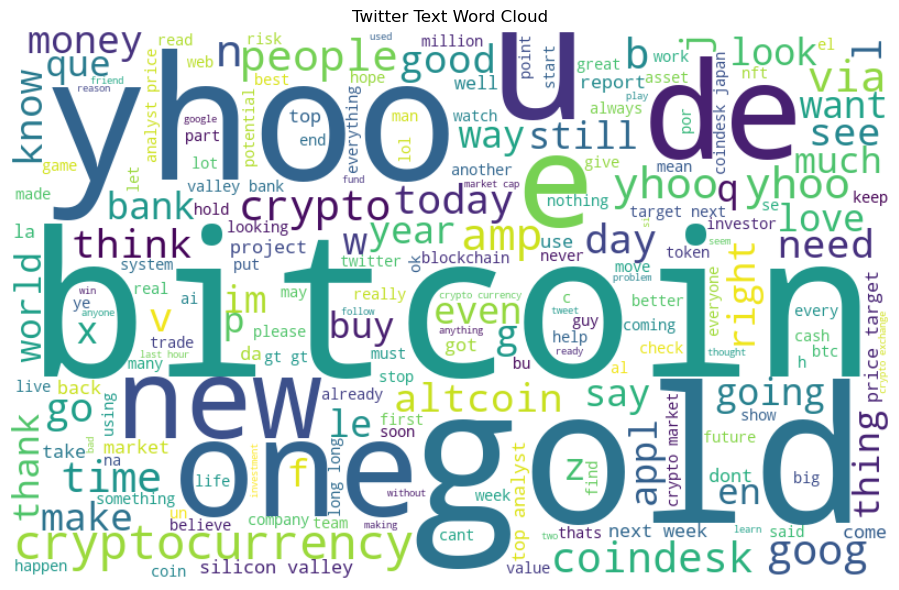

In [59]:
#Creating a word cloud from text
from wordcloud import WordCloud
import matplotlib.pyplot as plt
titles_text = ' '.join(trade_df['preprocessed_text'])
wordcloud = WordCloud(width=800, height=500, background_color='white').generate(titles_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Twitter Text Word Cloud')
plt.axis('off')
plt.tight_layout()
plt.show()   

In [60]:
#extract all the hashtags from our text
trade_df['hashtags_all'] = trade_df['Text'].str.findall(r'#\w+')
#counts the occurance of each hashtags 
hashtags_all=trade_df['Text'].str.findall(r'#\w+')
count_hashtags= hashtags_all.explode().value_counts()
count_hashtags[:10]

#altcoin           2563
#cryptocurrency    2544
#Bitcoin           2423
#bitcoin           1379
#crypto            1327
#BTC               1155
#Crypto            1112
#PAW                797
#blockchain         636
#memecoins          613
Name: Text, dtype: int64

# bar diagram of top 10 hashtags with its counts

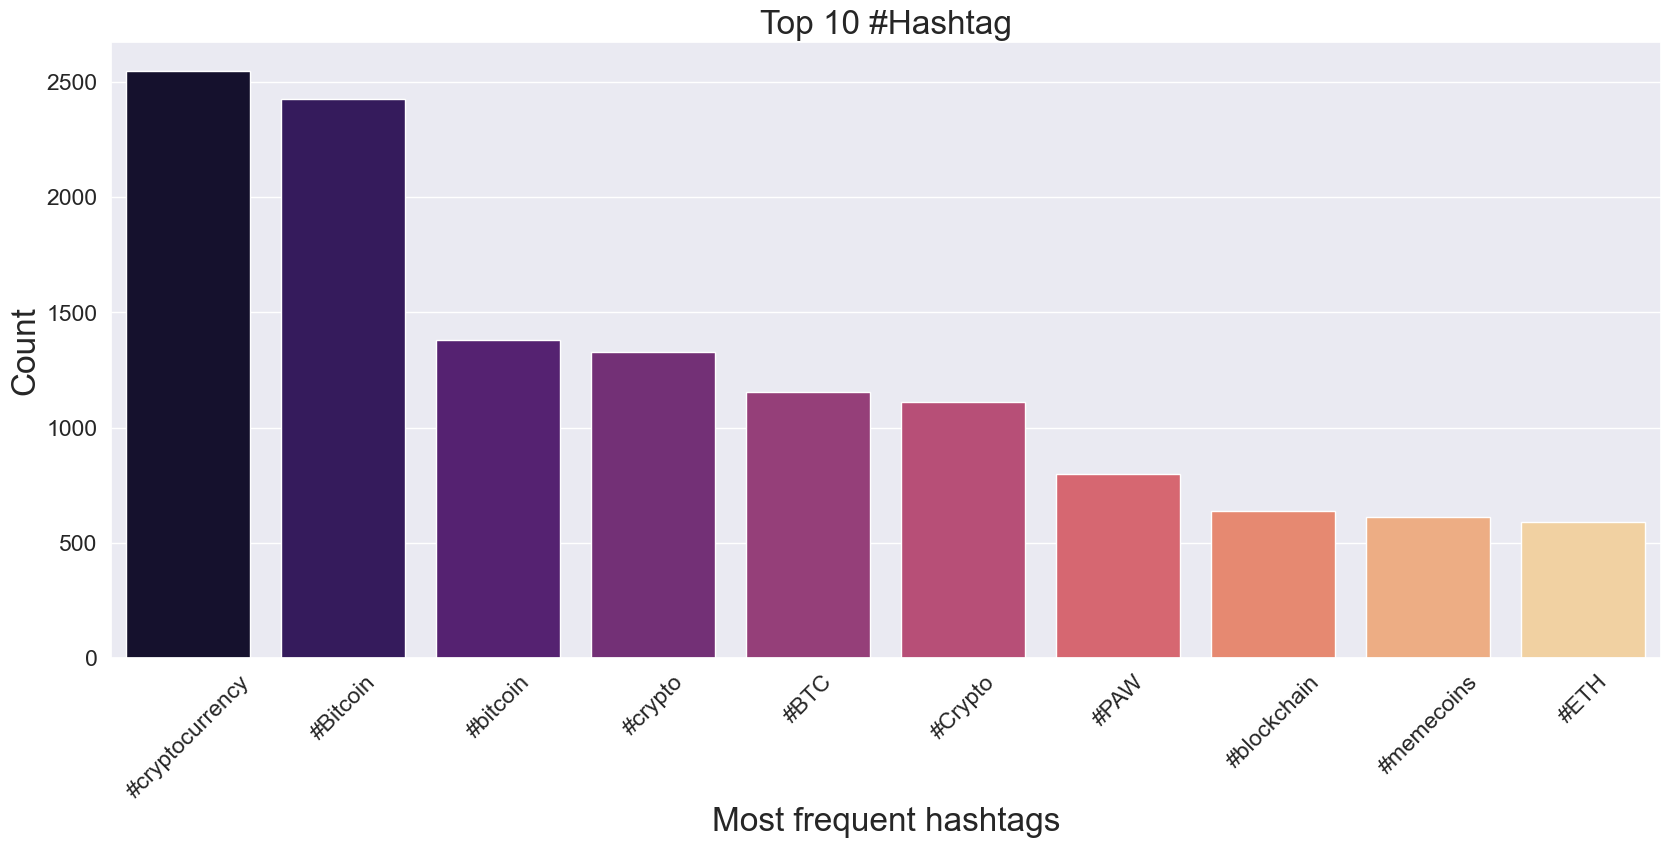

In [61]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=1.5)

sns.barplot(x=count_hashtags.index[1:11], y=count_hashtags[1:11],palette='magma')
plt.title('Top 10 #Hashtag',fontsize=24)
plt.xticks(rotation=45)
plt.xlabel('Most frequent hashtags',fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.show()

# Top 10 most active users 

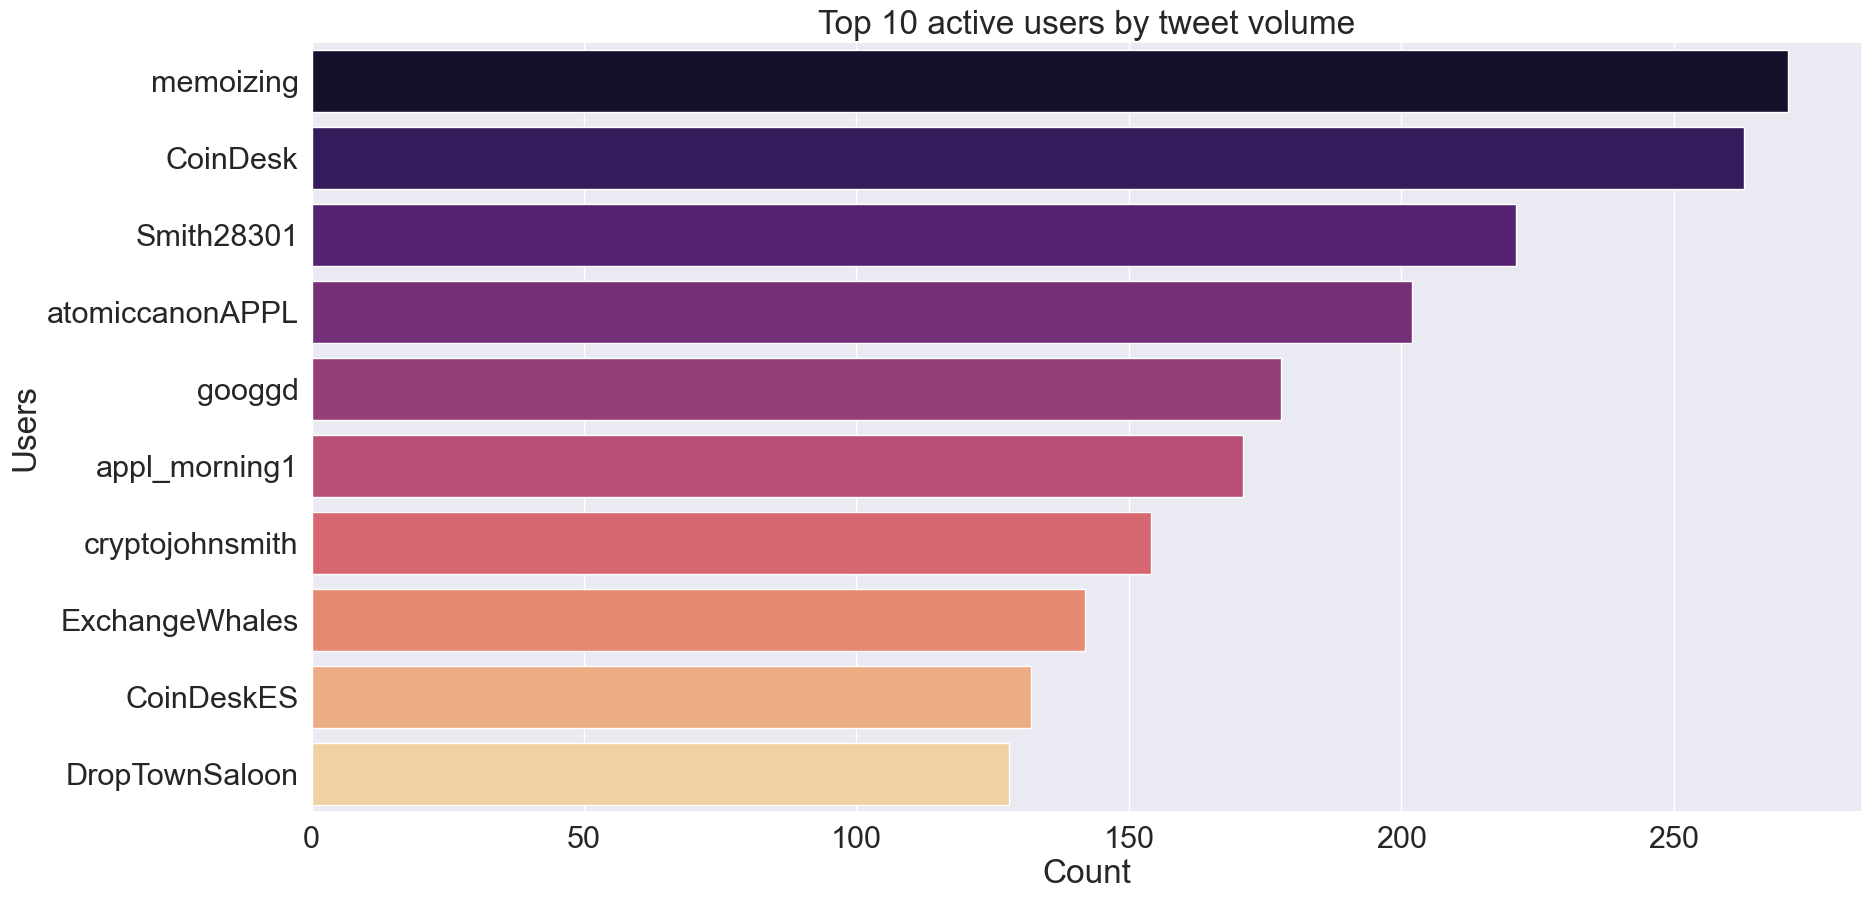

In [62]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=2)
tweets_by_user = trade_df.groupby('User').size().sort_values(ascending=False)
sns.barplot(x=tweets_by_user[:10], y=tweets_by_user[:10].index,palette='magma')
plt.title('Top 10 active users by tweet volume',fontsize=24)
plt.xlabel('Count',fontsize=24)
plt.ylabel('Users',fontsize=24)
plt.show()

# WordCloud of Users 

<function matplotlib.pyplot.show(close=None, block=None)>

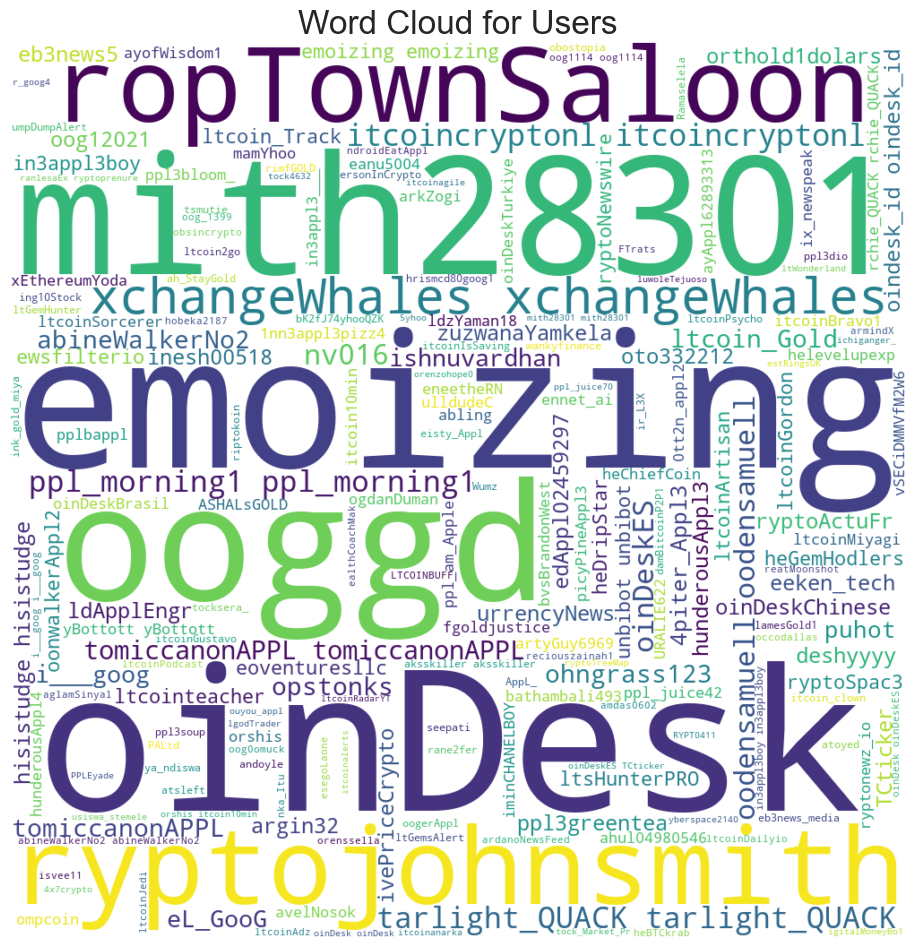

In [63]:
all_users = ' ' .join(tweets_by_user[1:] for tweets_by_user in trade_df['User'])

wordcloud_twitter = WordCloud(height=1000, width=1000,background_color="white",).generate(all_users)
plt.figure(figsize=(10, 10))
plt.imshow(wordcloud_twitter, interpolation="bilinear")
plt.title('Word Cloud for Users')
plt.axis('off')
plt.tight_layout()
plt.show

# Daily number of tweet 

In [64]:
trade_df.head()

Datetime             Tweet Id  \
0 2023-03-10 23:58:29  1634342993812414464   
1 2023-03-10 23:58:19  1634342954755313664   
2 2023-03-10 23:57:48  1634342825465708545   
3 2023-03-10 23:57:48  1634342821837811712   
4 2023-03-10 23:57:40  1634342788518248448   

                                                                                                                                                          Text  \
0  #Ethereum price update: \n\n#ETH $1430.93 USD\n#Bitcoin 0.07079623687966773 #BTC\n\nFollow for recent ETH price updates\n#altcoin, #cryptocurrency, #crypto   
1                                                                                                        @Altcoin_Gems_ @Lotto_Arb Wow, this is Fstastic... 🚀🚀   
2                                                                                                                                  @Altcoin_Gold Missing $DSLA   
3                                                                                                                    @Altcoin_Gems_ @Lotto_Arb Wow interesting   
4                                                                                             @TreatsBot $paw #paw #altcoin #memecoins https://t.co/hikIDhl0eo   

              User                                preprocessed_text  \
0   0xEthereumYoda  price update usd follow recent eth price update   
1  missufee1410213                                     wow fstastic   
2      migueldiz0n                                          missing   
3         Hanitzy_                                  wow interesting   
4         RifainAP                                       hikidhl eo   

                                                            hashtags_all  
0  [#Ethereum, #ETH, #Bitcoin, #BTC, #altcoin, #cryptocurrency, #crypto]  
1                                                                     []  
2                                                                     []  
3                                                                     []  
4                                           [#paw, #altcoin, #memecoins]

In [65]:
trade_df['Datetime'] = pd.to_datetime(trade_df['Datetime'], format='%d/%m/%Y')


In [66]:
trade_df['Date'] = trade_df['Datetime'].dt.date

In [67]:
trade_df.head()

Datetime             Tweet Id  \
0 2023-03-10 23:58:29  1634342993812414464   
1 2023-03-10 23:58:19  1634342954755313664   
2 2023-03-10 23:57:48  1634342825465708545   
3 2023-03-10 23:57:48  1634342821837811712   
4 2023-03-10 23:57:40  1634342788518248448   

                                                                                                                                                          Text  \
0  #Ethereum price update: \n\n#ETH $1430.93 USD\n#Bitcoin 0.07079623687966773 #BTC\n\nFollow for recent ETH price updates\n#altcoin, #cryptocurrency, #crypto   
1                                                                                                        @Altcoin_Gems_ @Lotto_Arb Wow, this is Fstastic... 🚀🚀   
2                                                                                                                                  @Altcoin_Gold Missing $DSLA   
3                                                                                                                    @Altcoin_Gems_ @Lotto_Arb Wow interesting   
4                                                                                             @TreatsBot $paw #paw #altcoin #memecoins https://t.co/hikIDhl0eo   

              User                                preprocessed_text  \
0   0xEthereumYoda  price update usd follow recent eth price update   
1  missufee1410213                                     wow fstastic   
2      migueldiz0n                                          missing   
3         Hanitzy_                                  wow interesting   
4         RifainAP                                       hikidhl eo   

                                                            hashtags_all  \
0  [#Ethereum, #ETH, #Bitcoin, #BTC, #altcoin, #cryptocurrency, #crypto]   
1                                                                     []   
2                                                                     []   
3                                                                     []   
4                                           [#paw, #altcoin, #memecoins]   

         Date  
0  2023-03-10  
1  2023-03-10  
2  2023-03-10  
3  2023-03-10  
4  2023-03-10

In [68]:
trade_df['Date'].value_counts()

2023-03-10    22309
2023-03-09     4256
2023-03-08     3260
2023-03-07     2756
2023-03-06     2491
2023-03-05     1299
Name: Date, dtype: int64

In [69]:
tweets_per_day = trade_df.groupby('Date').size().sort_values(ascending=False)


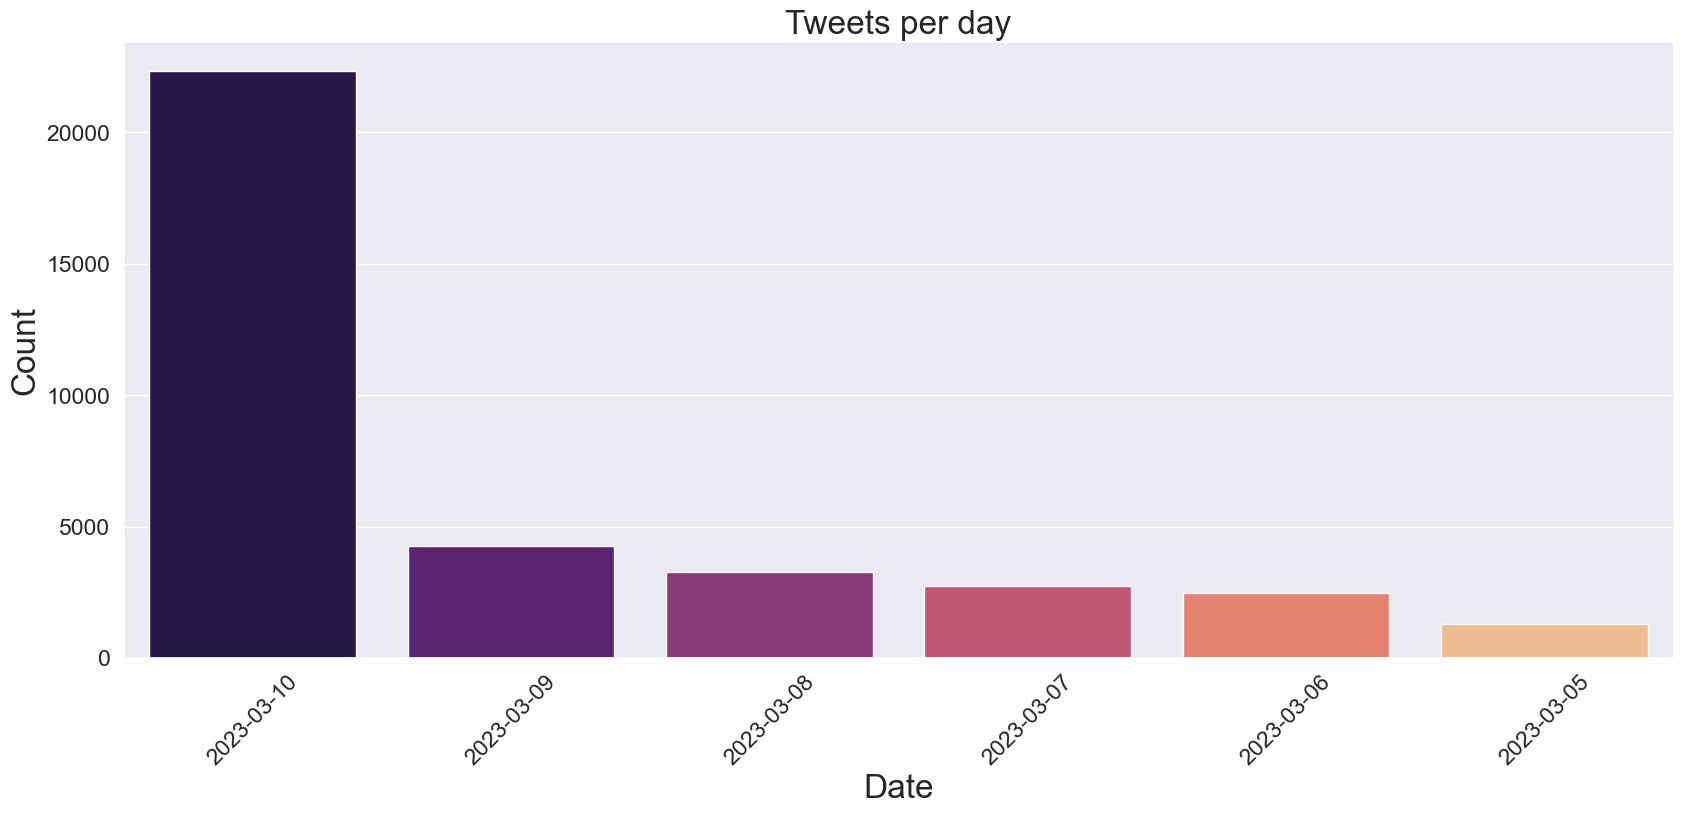

In [70]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=1.5)

sns.barplot(x=tweets_per_day.index, y=tweets_per_day,palette='magma')
plt.title('Tweets per day',fontsize=24)
plt.xticks(rotation=45)
plt.xlabel('Date',fontsize=24)
plt.ylabel('Count',fontsize=24)
plt.show()
#3/100 ma k k words thyo 

# Maximum Number of Tweets by User Per Day

In [71]:
trade_df.head()

Datetime             Tweet Id  \
0 2023-03-10 23:58:29  1634342993812414464   
1 2023-03-10 23:58:19  1634342954755313664   
2 2023-03-10 23:57:48  1634342825465708545   
3 2023-03-10 23:57:48  1634342821837811712   
4 2023-03-10 23:57:40  1634342788518248448   

                                                                                                                                                          Text  \
0  #Ethereum price update: \n\n#ETH $1430.93 USD\n#Bitcoin 0.07079623687966773 #BTC\n\nFollow for recent ETH price updates\n#altcoin, #cryptocurrency, #crypto   
1                                                                                                        @Altcoin_Gems_ @Lotto_Arb Wow, this is Fstastic... 🚀🚀   
2                                                                                                                                  @Altcoin_Gold Missing $DSLA   
3                                                                                                                    @Altcoin_Gems_ @Lotto_Arb Wow interesting   
4                                                                                             @TreatsBot $paw #paw #altcoin #memecoins https://t.co/hikIDhl0eo   

              User                                preprocessed_text  \
0   0xEthereumYoda  price update usd follow recent eth price update   
1  missufee1410213                                     wow fstastic   
2      migueldiz0n                                          missing   
3         Hanitzy_                                  wow interesting   
4         RifainAP                                       hikidhl eo   

                                                            hashtags_all  \
0  [#Ethereum, #ETH, #Bitcoin, #BTC, #altcoin, #cryptocurrency, #crypto]   
1                                                                     []   
2                                                                     []   
3                                                                     []   
4                                           [#paw, #altcoin, #memecoins]   

         Date  
0  2023-03-10  
1  2023-03-10  
2  2023-03-10  
3  2023-03-10  
4  2023-03-10

In [72]:
tweets_per_user_per_day = trade_df.groupby(['User','Date']).size().sort_values(ascending=False)
tweets_per_user_per_day_reset= tweets_per_user_per_day.reset_index(name='Count Per Day')[:10]
tweets_per_user_per_day_reset

User        Date  Count Per Day
0  cryptojohnsmith  2023-03-10            154
1   ExchangeWhales  2023-03-10            142
2   DropTownSaloon  2023-03-10            110
3  Starlight_QUACK  2023-03-10            103
4  atomiccanonAPPL  2023-03-10             95
5  bitcoincryptonl  2023-03-10             74
6        memoizing  2023-03-07             69
7         CoinDesk  2023-03-09             63
8         CoinDesk  2023-03-08             60
9        memoizing  2023-03-05             59

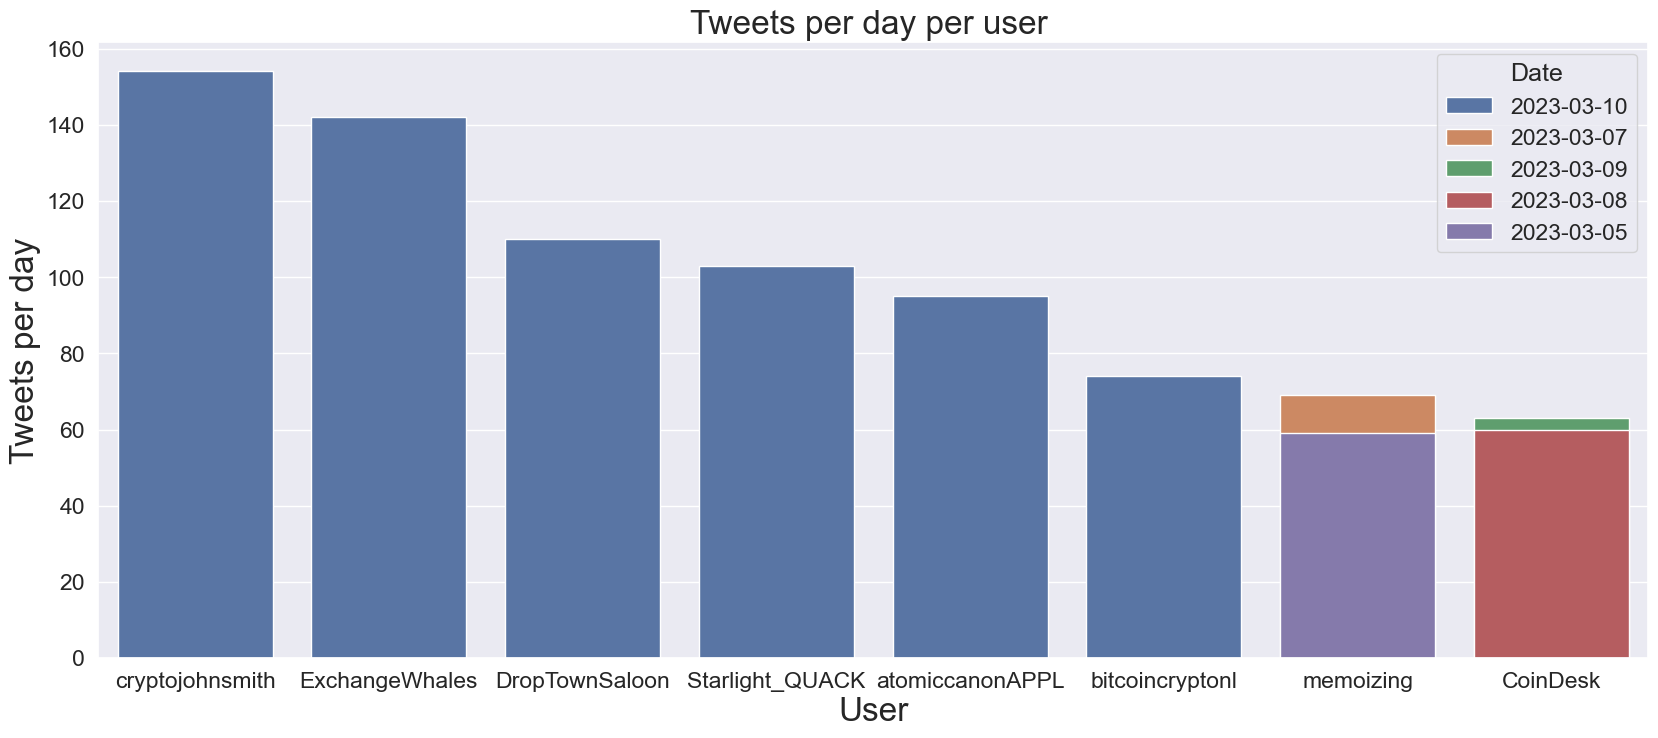

In [73]:
plt.figure(figsize=(20, 8))
sns.set(font_scale=1.5)

sns.barplot(x=tweets_per_user_per_day_reset['User'], y=tweets_per_user_per_day_reset['Count Per Day'],hue=tweets_per_user_per_day_reset['Date'],dodge=False)
plt.title('Tweets per day per user ',fontsize=24)
#plt.xticks(rotation=45)
plt.xlabel('User',fontsize=24)
plt.ylabel('Tweets per day',fontsize=24)
plt.show()

# Frequent hashtags per day 

In [74]:
trade_df.head()

Datetime             Tweet Id  \
0 2023-03-10 23:58:29  1634342993812414464   
1 2023-03-10 23:58:19  1634342954755313664   
2 2023-03-10 23:57:48  1634342825465708545   
3 2023-03-10 23:57:48  1634342821837811712   
4 2023-03-10 23:57:40  1634342788518248448   

                                                                                                                                                          Text  \
0  #Ethereum price update: \n\n#ETH $1430.93 USD\n#Bitcoin 0.07079623687966773 #BTC\n\nFollow for recent ETH price updates\n#altcoin, #cryptocurrency, #crypto   
1                                                                                                        @Altcoin_Gems_ @Lotto_Arb Wow, this is Fstastic... 🚀🚀   
2                                                                                                                                  @Altcoin_Gold Missing $DSLA   
3                                                                                                                    @Altcoin_Gems_ @Lotto_Arb Wow interesting   
4                                                                                             @TreatsBot $paw #paw #altcoin #memecoins https://t.co/hikIDhl0eo   

              User                                preprocessed_text  \
0   0xEthereumYoda  price update usd follow recent eth price update   
1  missufee1410213                                     wow fstastic   
2      migueldiz0n                                          missing   
3         Hanitzy_                                  wow interesting   
4         RifainAP                                       hikidhl eo   

                                                            hashtags_all  \
0  [#Ethereum, #ETH, #Bitcoin, #BTC, #altcoin, #cryptocurrency, #crypto]   
1                                                                     []   
2                                                                     []   
3                                                                     []   
4                                           [#paw, #altcoin, #memecoins]   

         Date  
0  2023-03-10  
1  2023-03-10  
2  2023-03-10  
3  2023-03-10  
4  2023-03-10

We reported that numbers of tweets in date 2023-03-10 is significantly higher than any other dates.

In [75]:
hashtags_ten= trade_df[trade_df['Date']== datetime.date(2023,3,10) ]


<function matplotlib.pyplot.show(close=None, block=None)>

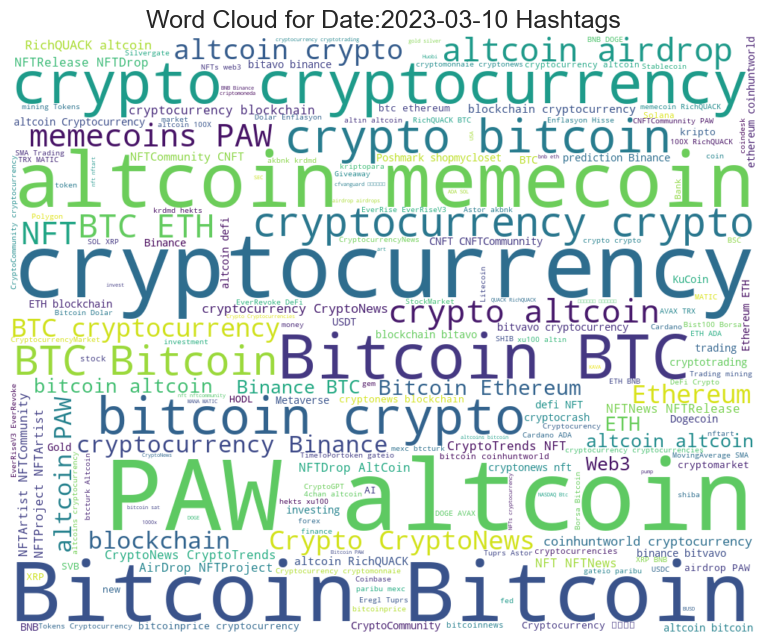

In [76]:
daily_hashtags = ' ' .join([hashtags_ten[1:] for hashtags_ten in hashtags_ten['Text'].str.findall(r'#\w+') for hashtags_ten in hashtags_ten])

wordcloud_percount = WordCloud(height=800, width=1000,background_color="white",).generate(daily_hashtags)
plt.figure(figsize=(8, 10))
plt.imshow(wordcloud_percount, interpolation="bilinear")
plt.title('Word Cloud for Date:2023-03-10 Hashtags')
plt.axis('off')
plt.tight_layout()
#plt.savefig("twitter_logo_unigram_hashtags.png", format="png")
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

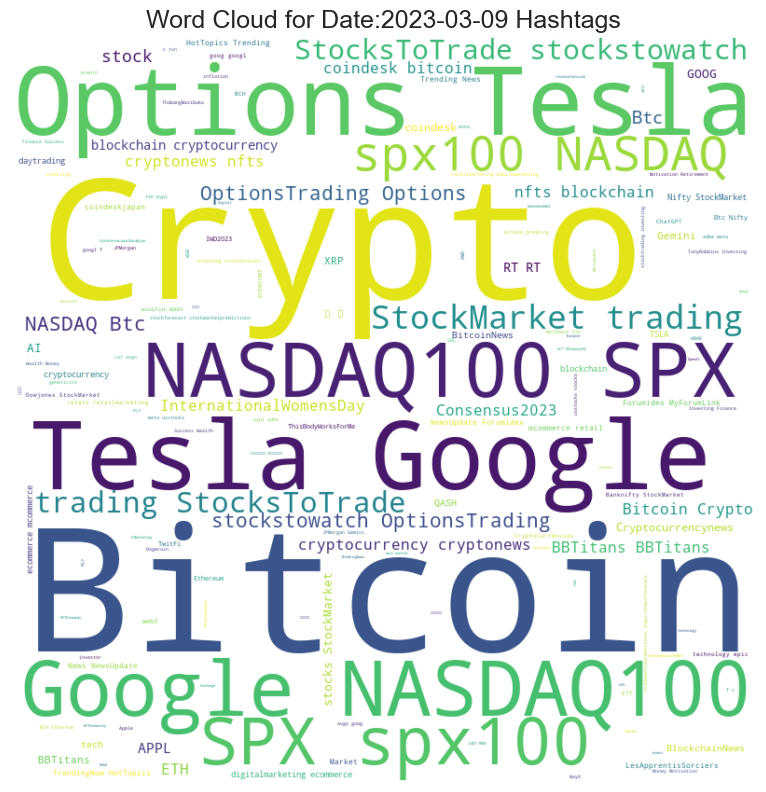

In [77]:
hashtags_nine= trade_df[trade_df['Date']== datetime.date(2023,3,8) ]

daily_hashtags = ' ' .join([hashtags_nine[1:] for hashtags_nine in hashtags_nine['Text'].str.findall(r'#\w+') for hashtags_nine in hashtags_nine])

wordcloud_percount = WordCloud(height=800, width=800,background_color="white",).generate(daily_hashtags)
plt.figure(figsize=(8, 10))
plt.imshow(wordcloud_percount, interpolation="bilinear")
plt.title('Word Cloud for Date:2023-03-09 Hashtags')
plt.axis('off')
plt.tight_layout()
#plt.savefig("twitter_logo_unigram_hashtags.png", format="png")
plt.show

In [78]:
def daily_hashtags(df,title):
#counts the occurance of each hashtags 
    hashtags_all=df['Text'].str.findall(r'#\w+')
    count_hashtags= hashtags_all.explode().value_counts()
    #count_hashtags
    plt.figure(figsize=(20, 8))
    sns.set(font_scale=1.5)

    sns.barplot(x=count_hashtags.index[1:11], y=count_hashtags[1:11],palette='magma')
    plt.title(f'Top 10 #Hashtag-{title}',fontsize=24)
    plt.xticks(rotation=45)
    plt.xlabel('Most frequent hashtags',fontsize=24)
    plt.ylabel('Count',fontsize=24)
    return plt.show()

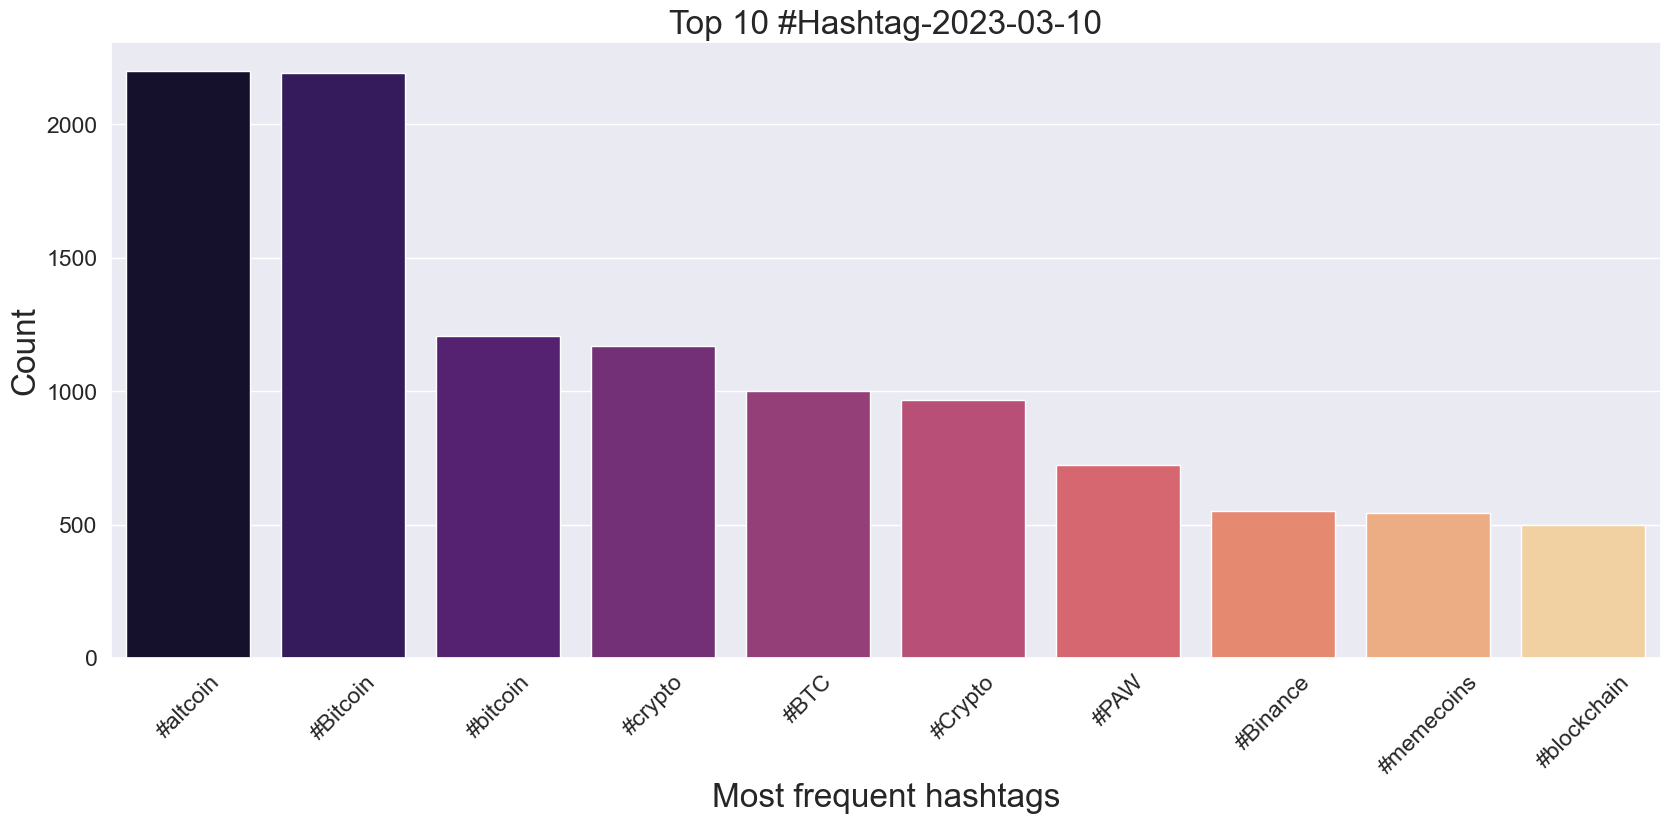

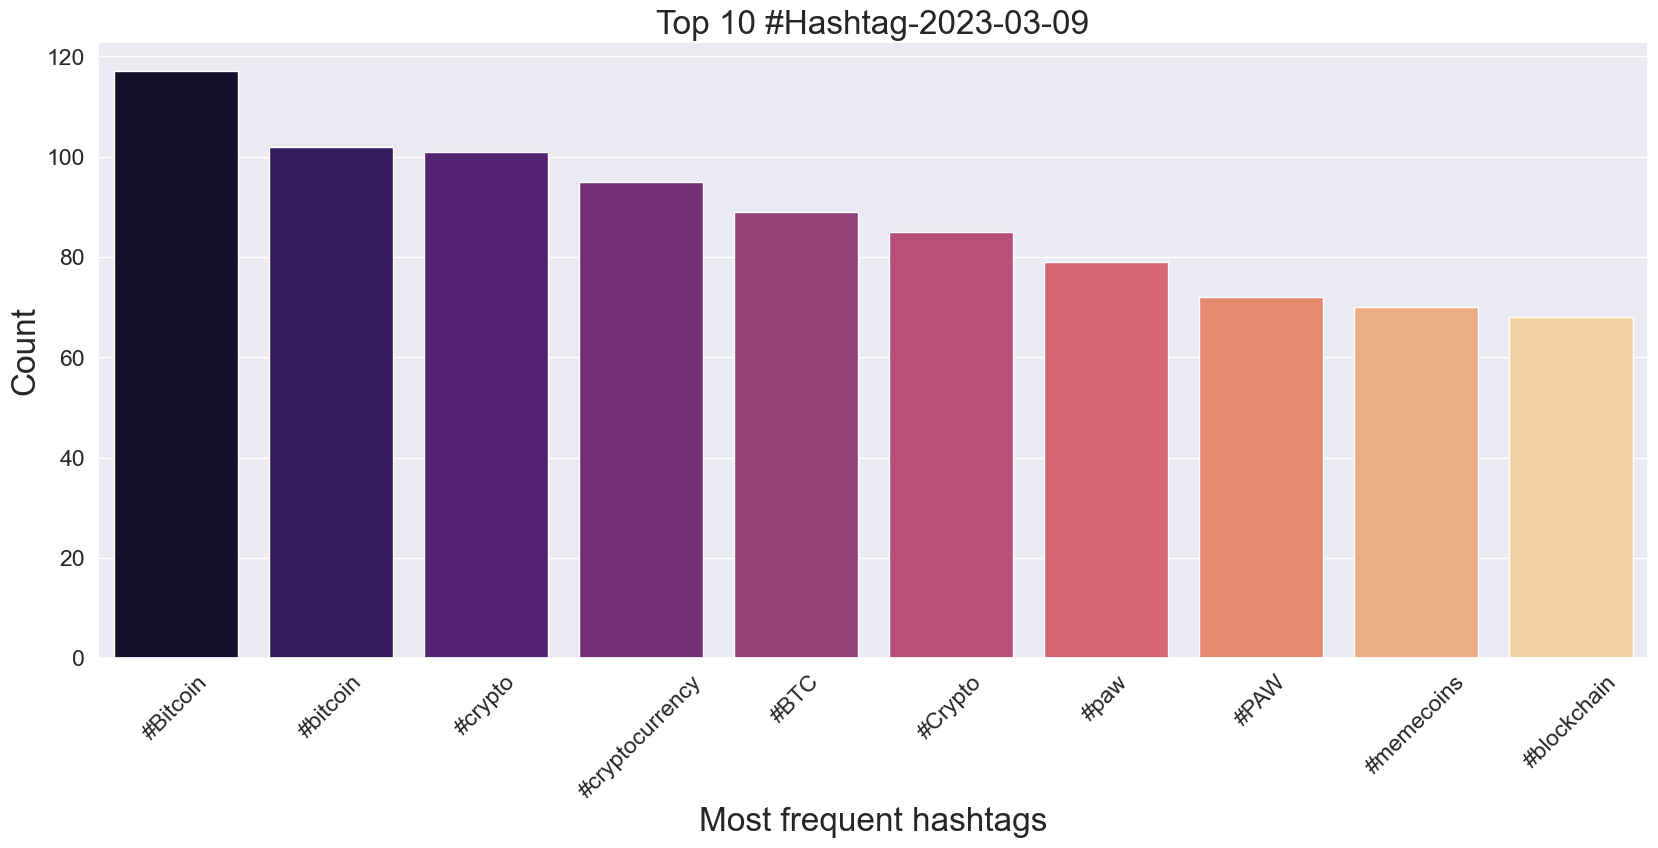

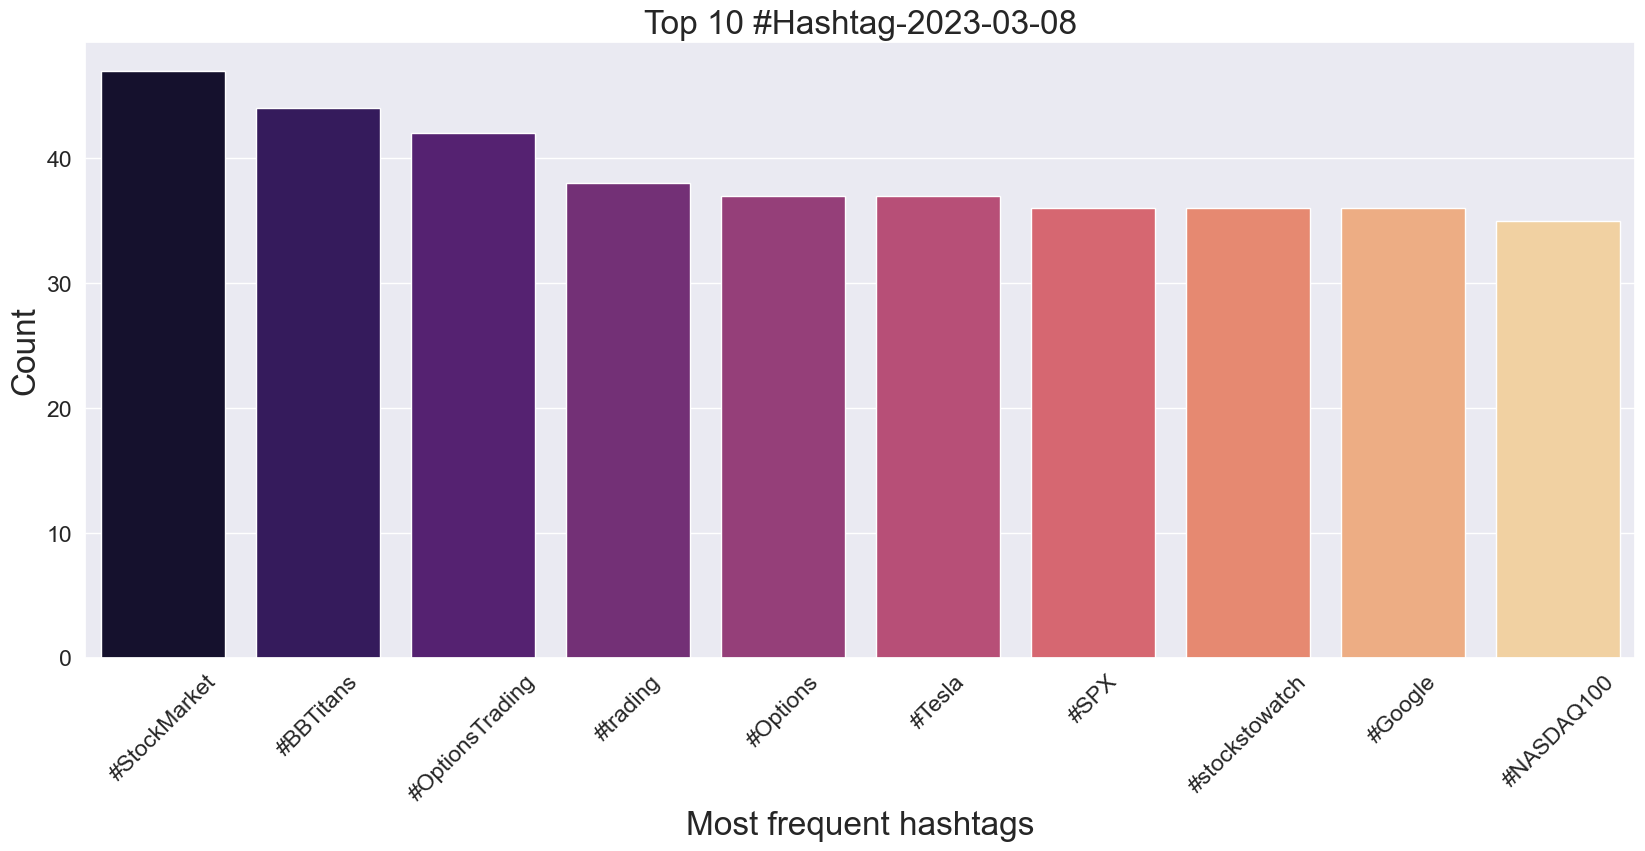

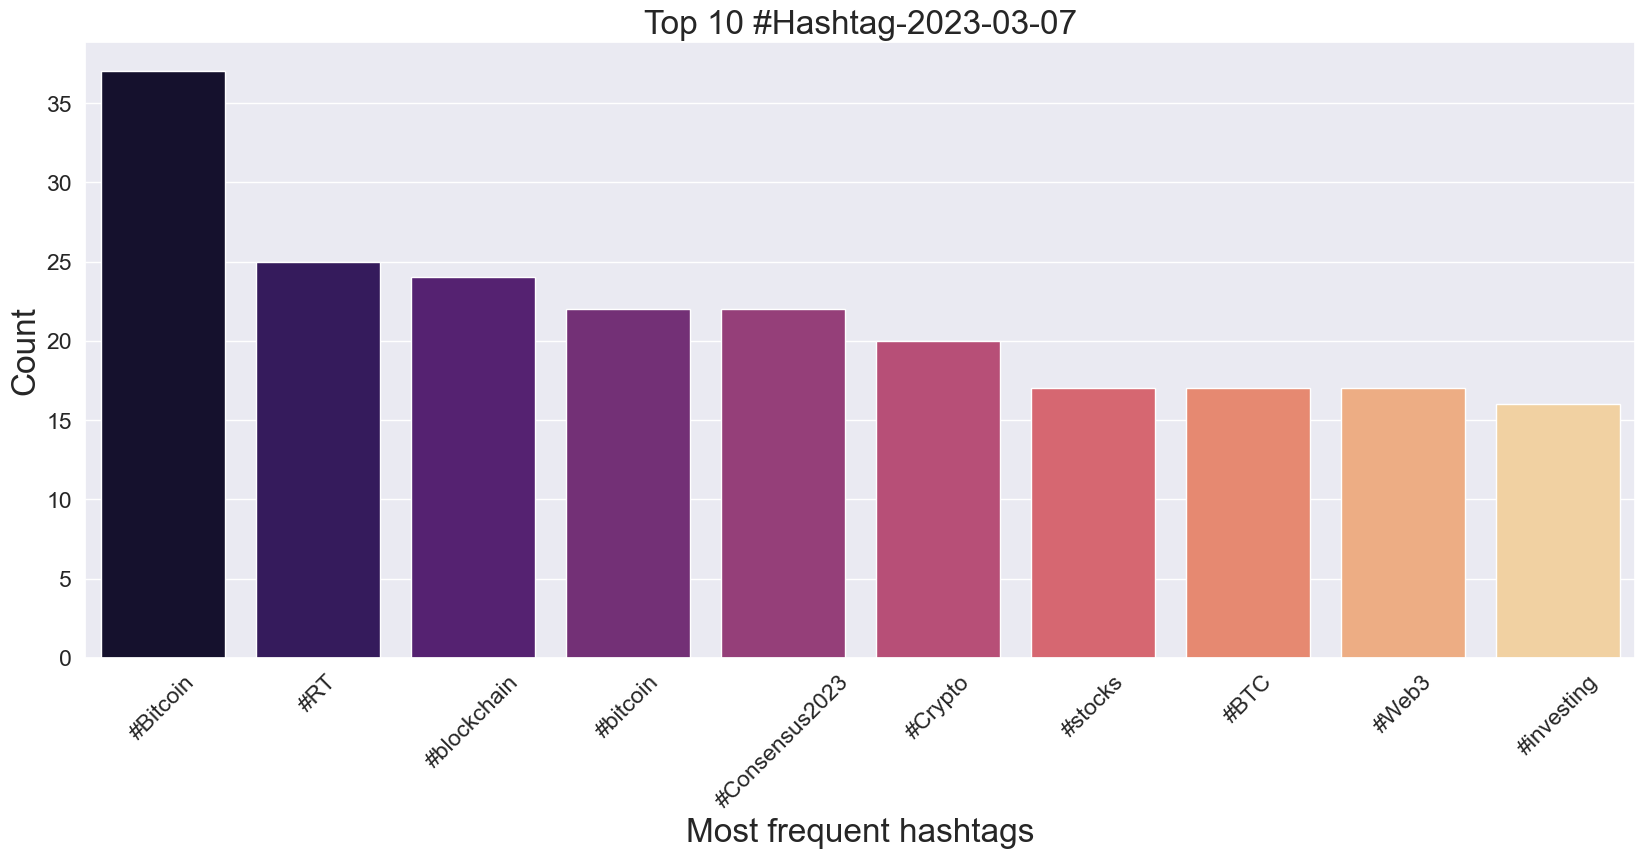

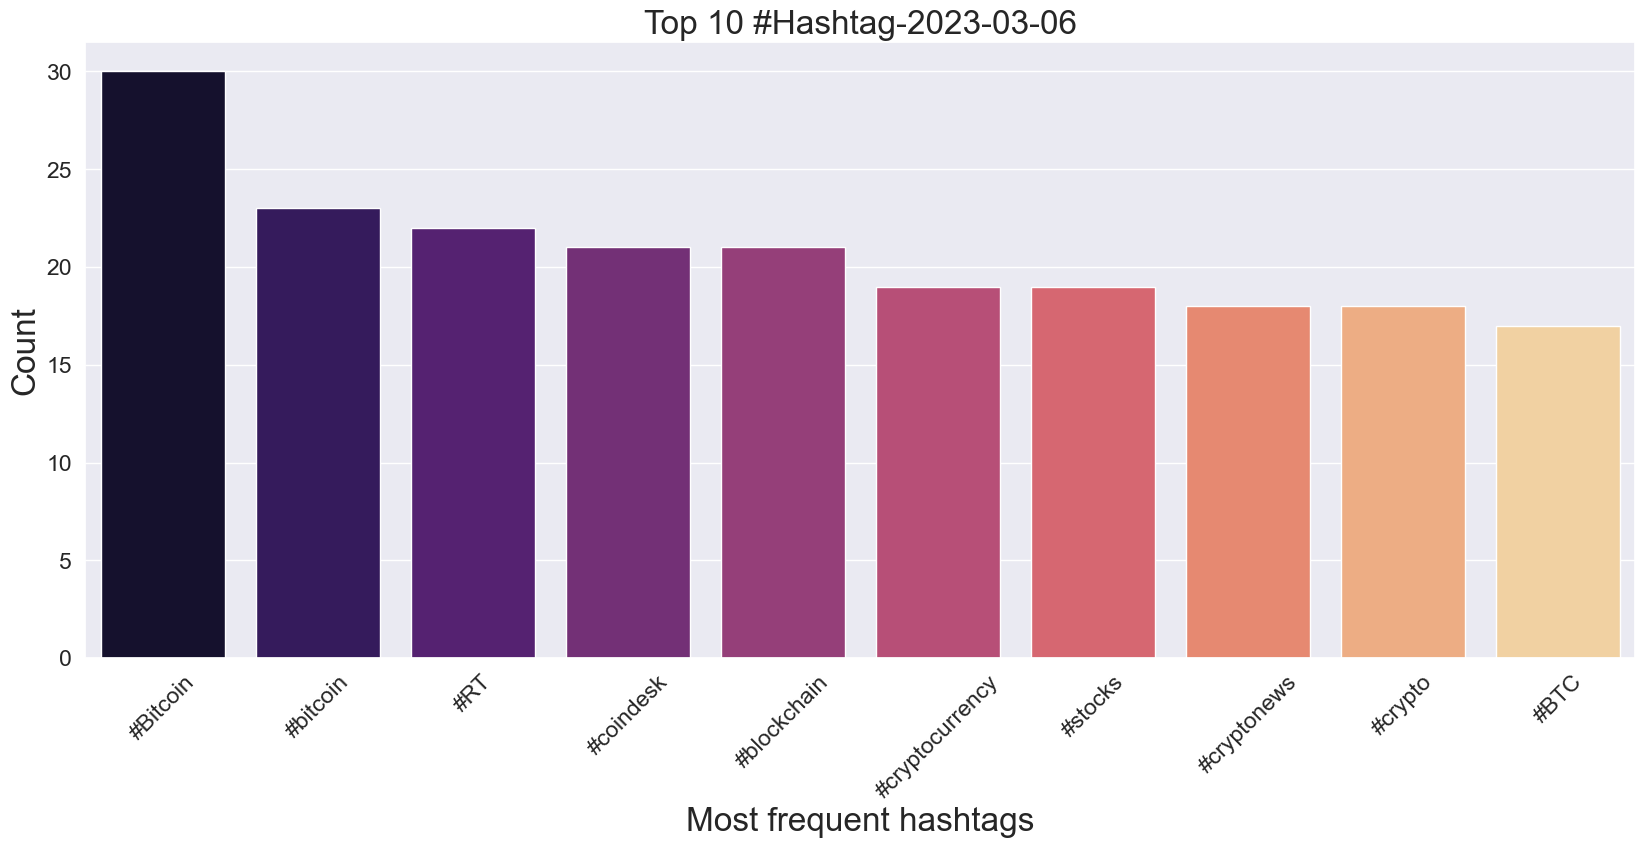

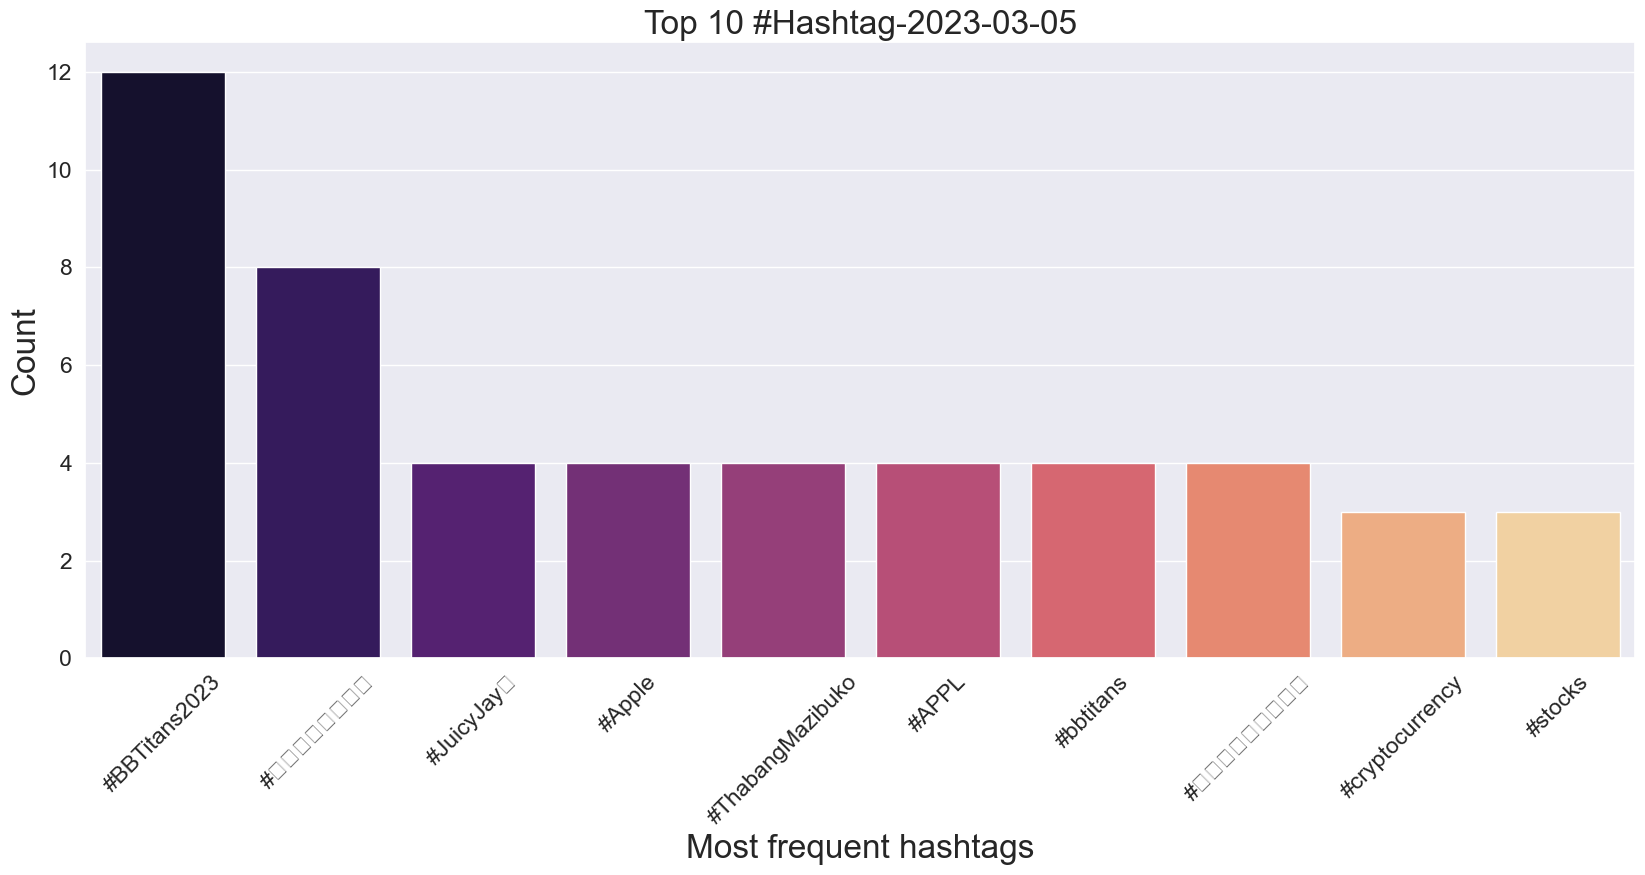

In [79]:
for dates in trade_df['Date'].unique():
    #date_formatting= re.sub(r'[\-]', r',',str(dates))
    daily_df= trade_df[trade_df['Date']== dates]
    daily_hashtags(daily_df,dates)


In [80]:
def daily_hashtags(df,title):
#counts the occurance of each hashtags 
    keywords=['altcoin', 'bitcoin','coindesk','cryptocurrency','gold','appl','goog','Yhoo']
    hashtags_all=df['Text'].str.findall(r'#\w+')
    
    count_hashtags= hashtags_all.explode().value_counts()
    
    #count_hashtags
    plt.figure(figsize=(20, 8))
    sns.set(font_scale=1.5)

    sns.barplot(x=count_hashtags.index[1:11], y=count_hashtags[1:11],palette='magma')
    plt.title(f'Top 10 #Hashtag-{title}',fontsize=24)
    plt.xticks(rotation=45)
    plt.xlabel('Most frequent hashtags',fontsize=24)
    plt.ylabel('Count',fontsize=24)
    return plt.show()

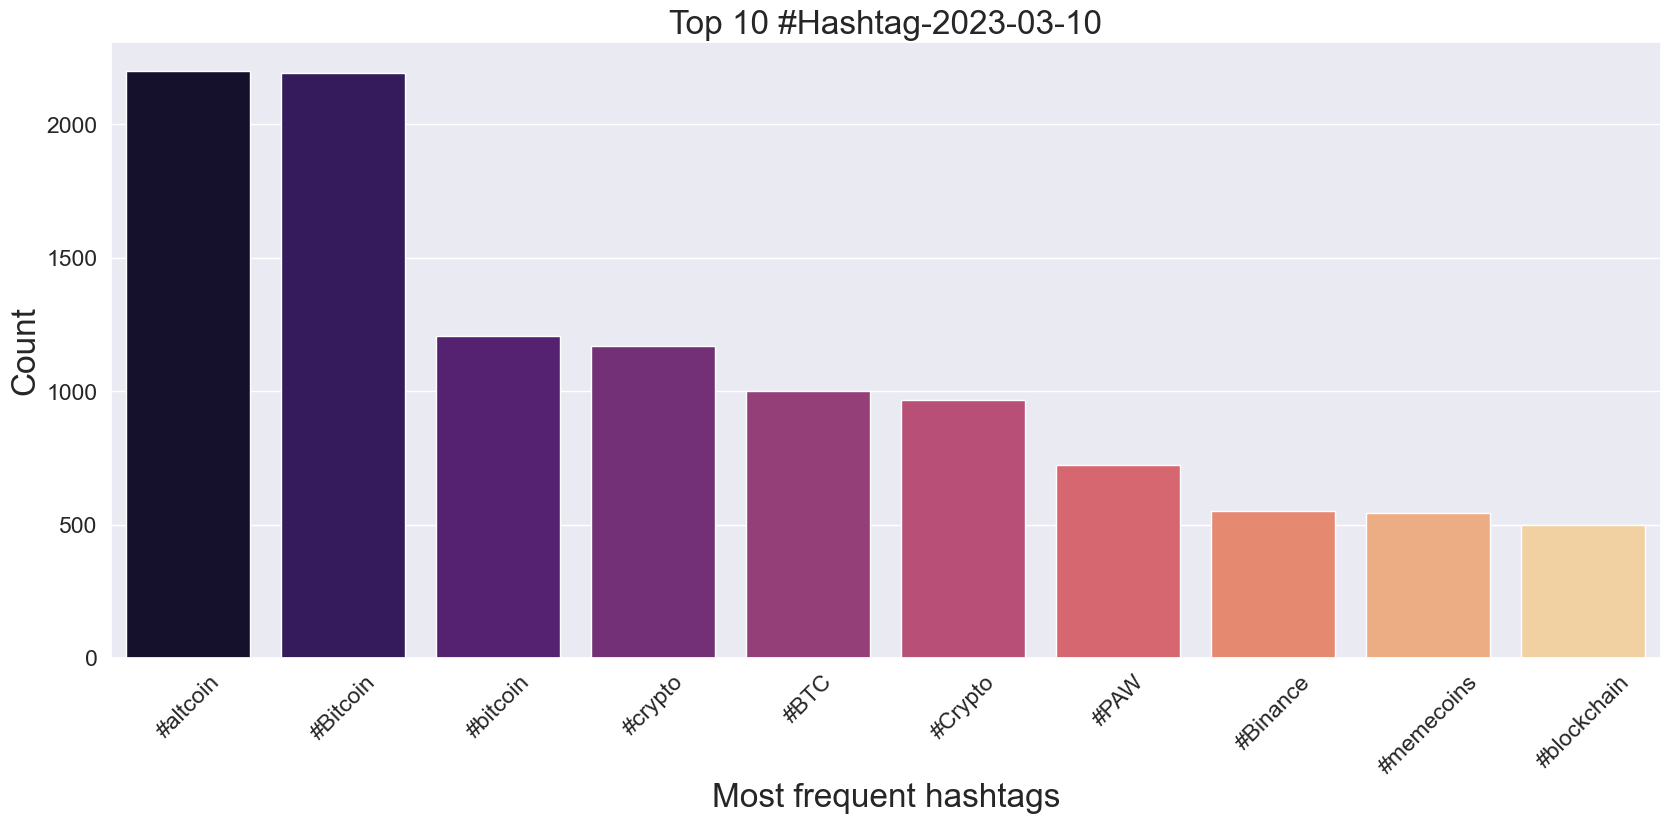

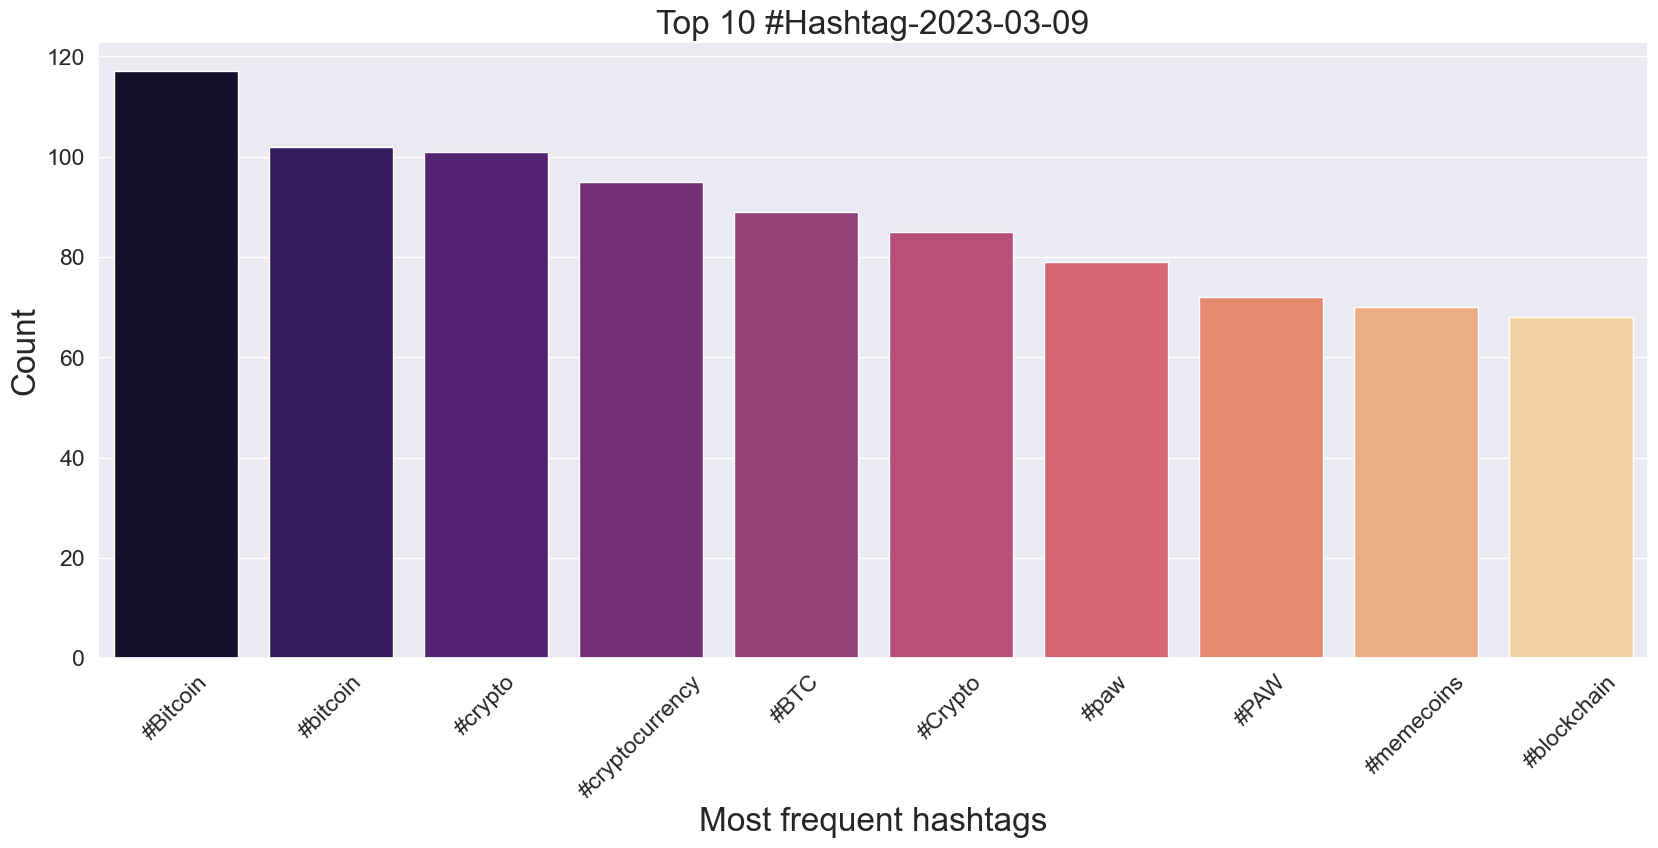

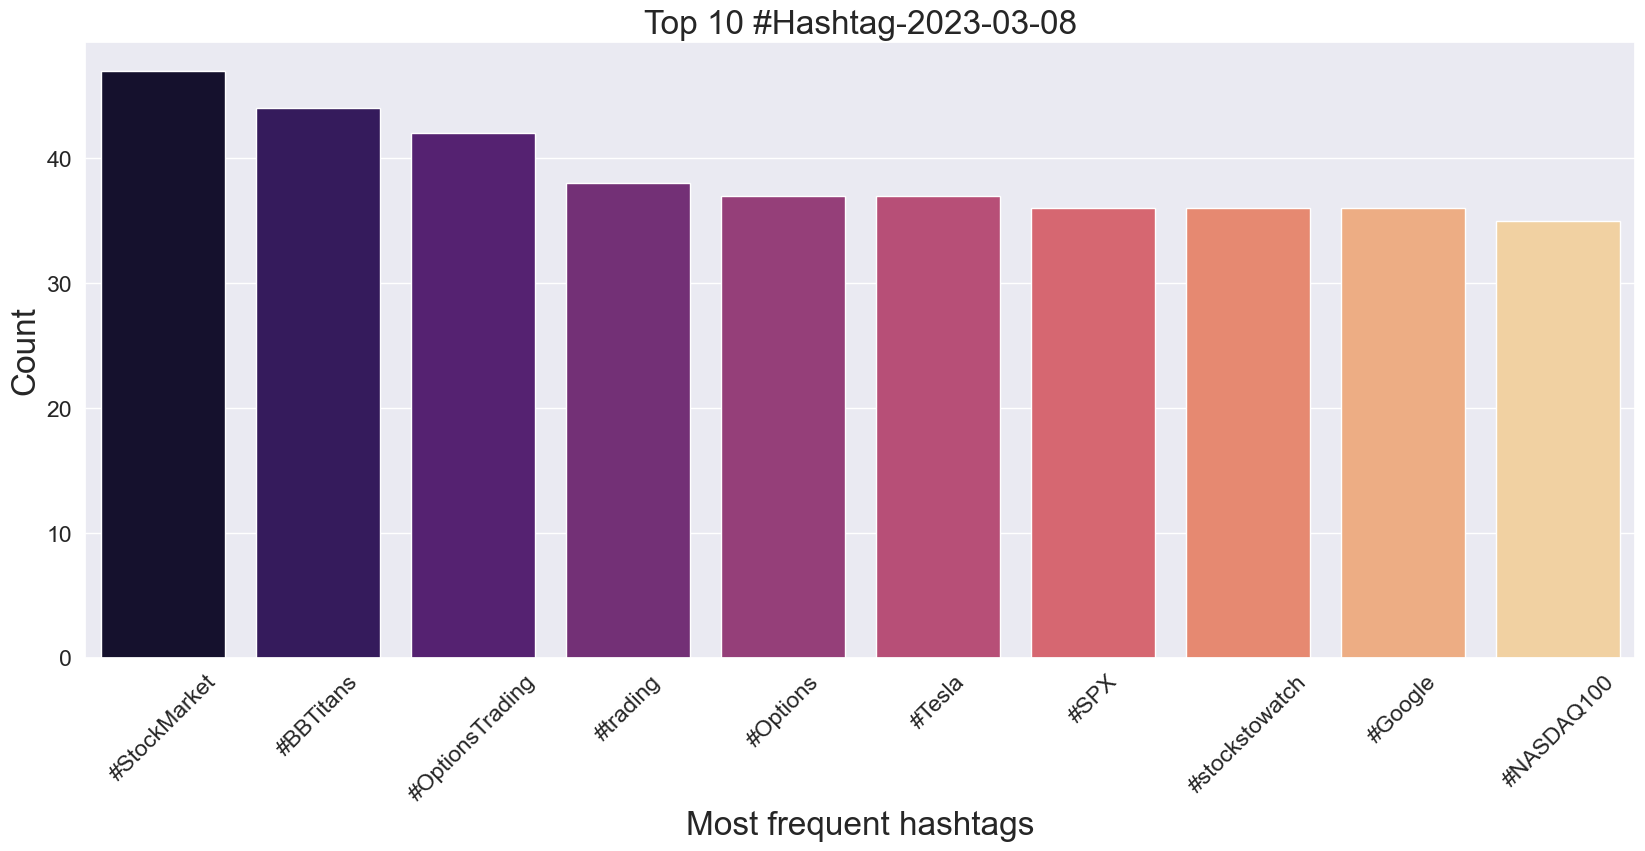

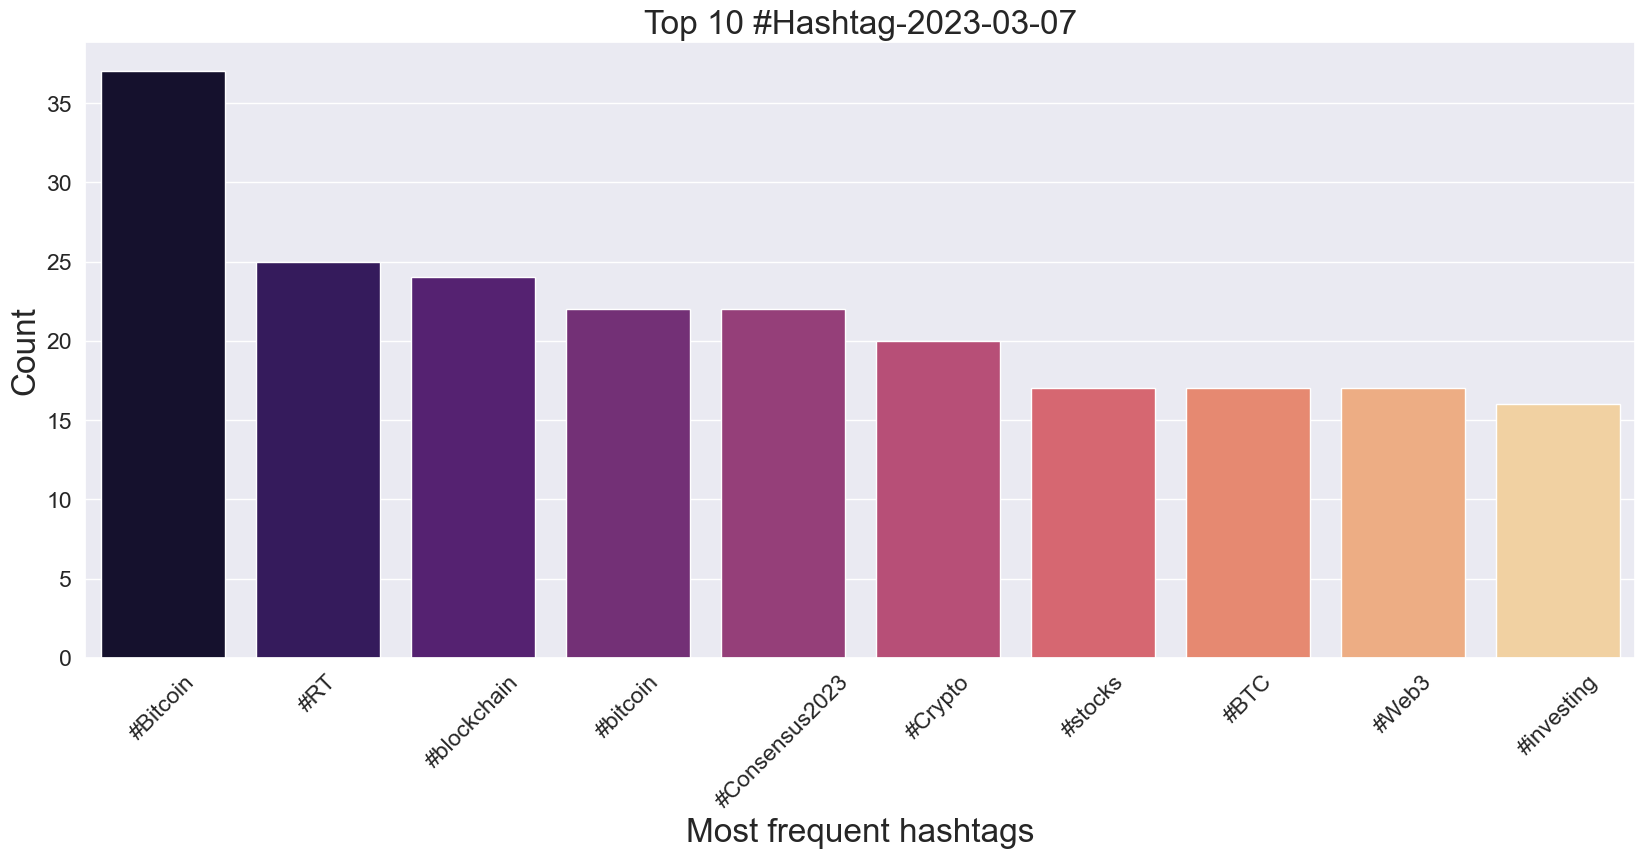

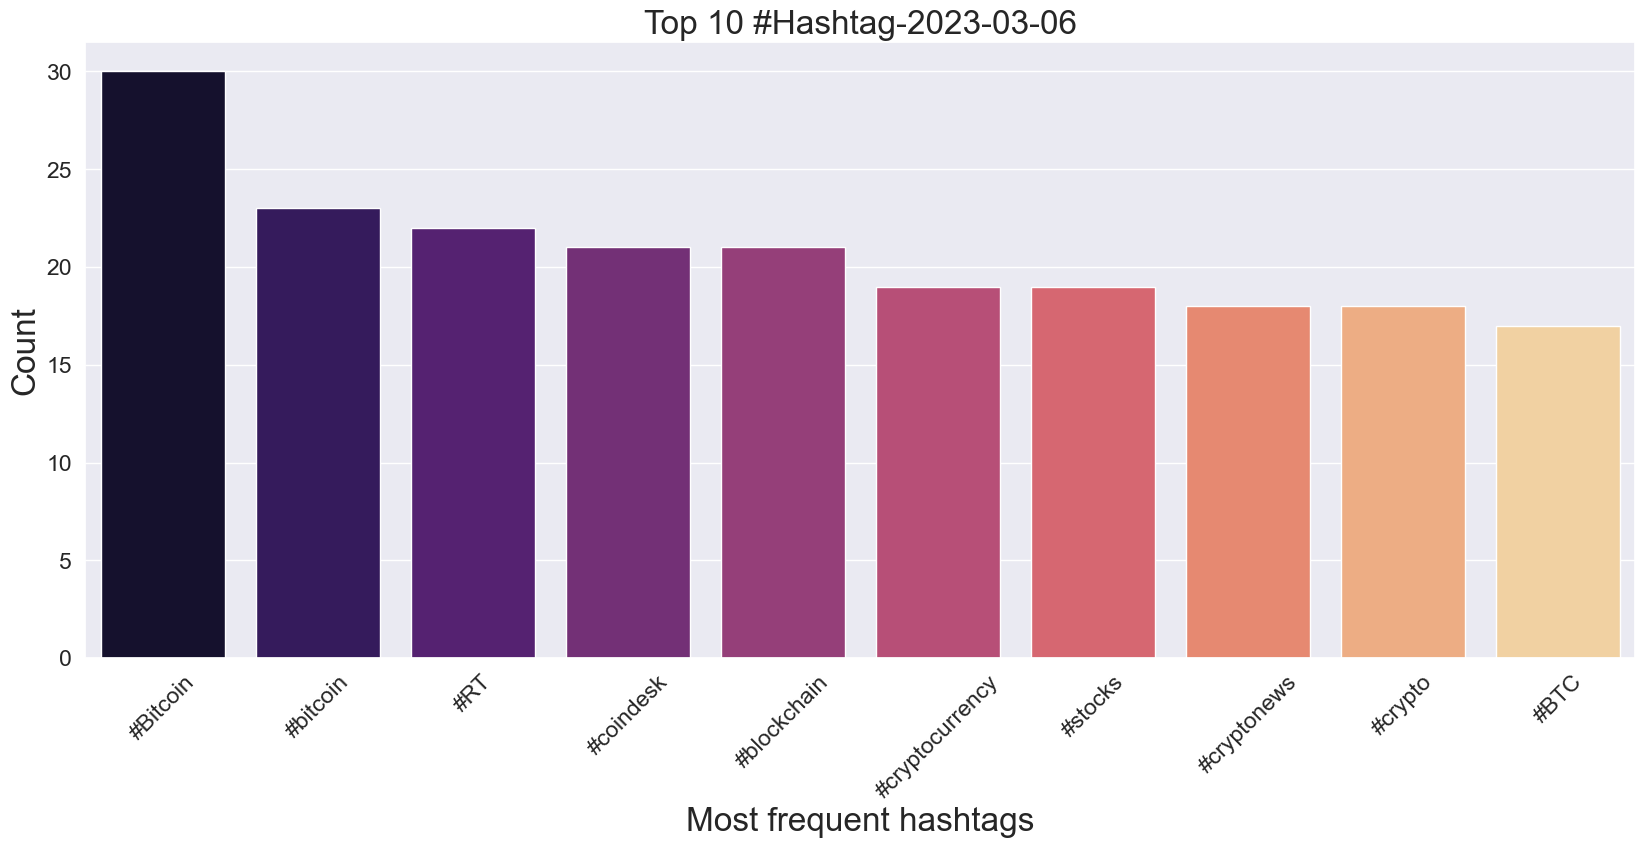

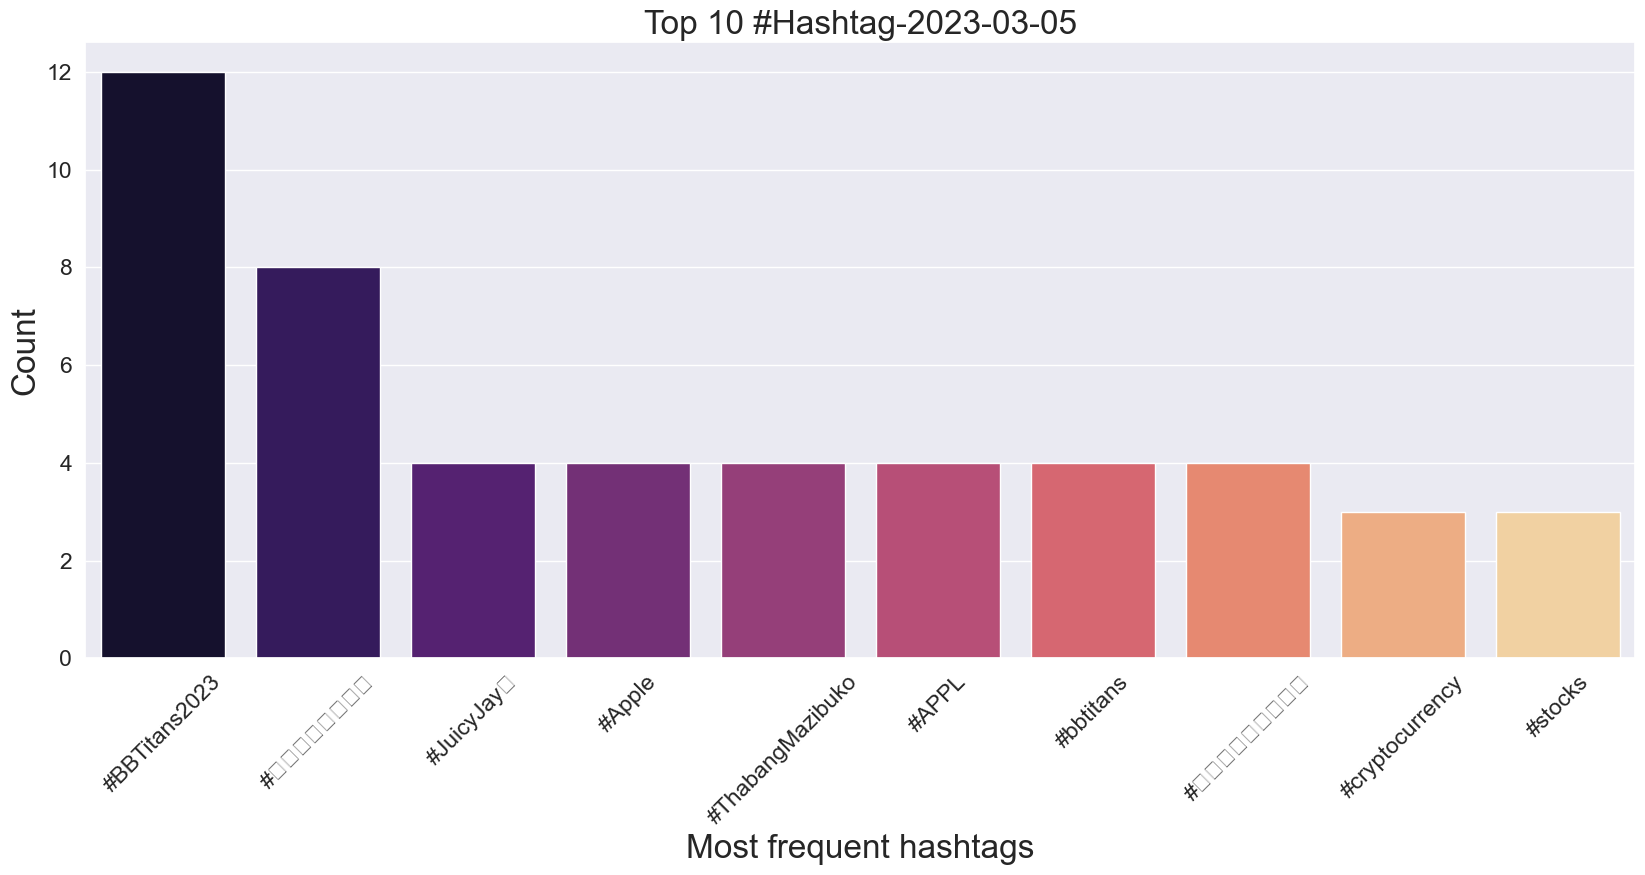

In [81]:
for dates in trade_df['Date'].unique():
    #date_formatting= re.sub(r'[\-]', r',',str(dates))
    daily_df= trade_df[trade_df['Date']== dates]
    daily_hashtags(daily_df,dates)


# Keywords Analysis

In [82]:
# Given keywords
keywords = ['Altcoin', 'Bitcoin', 'Coindesk', 'Cryptocurrency', 'Gold', 'APPL', 'GOOG', 'YHOO']

# DataFrame to store results
results = pd.DataFrame(index=pd.unique(trade_df['Date']), columns=keywords)
results.index.name = 'Date'


user_counts = {keyword: {} for keyword in keywords}

for keyword in keywords:
    # Count tweets containing the keyword for each day
    results[keyword] = trade_df[trade_df['Text'].str.contains(keyword, case=False, na=False)].groupby('Date').size()
    # Count unique users mentioning the keyword for each day
    user_counts[keyword] = trade_df[trade_df['Text'].str.contains(keyword, case=False, na=False)]['User'].nunique()

# Convert user_counts to DataFrame
user_results = pd.DataFrame.from_dict(user_counts, orient='index', columns=['Daily Users'])

# Daily number of tweets for each keyword

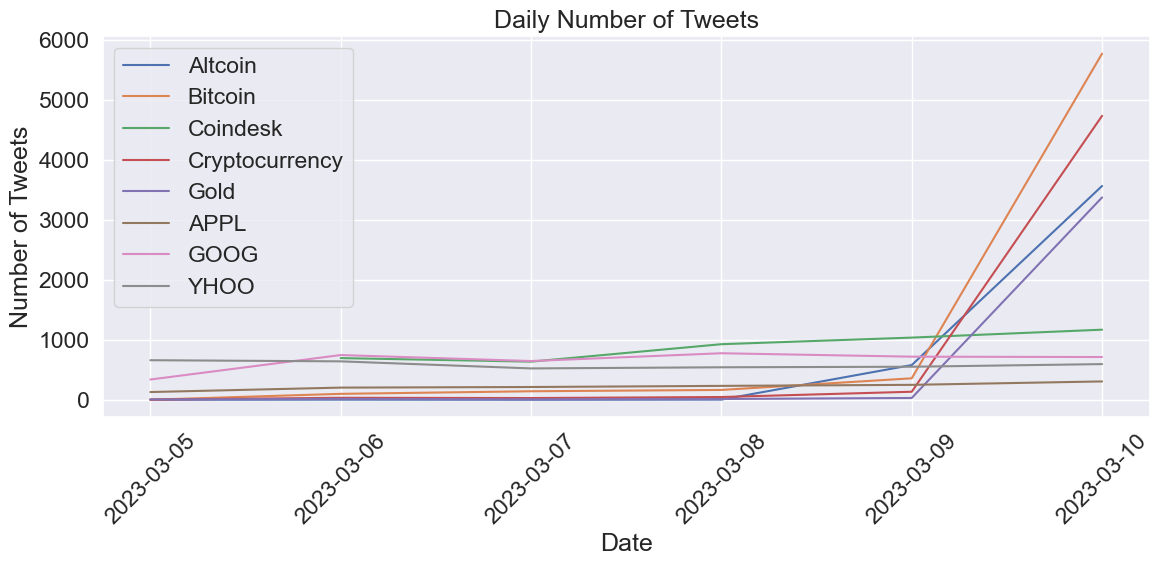

In [83]:
# Visualization of daily number of tweets for each keyword
plt.figure(figsize=(12, 6))
for keyword in keywords:
    plt.plot(results.index, results[keyword], label=keyword)
plt.title('Daily Number of Tweets')
plt.xlabel('Date')
plt.ylabel('Number of Tweets')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Daily Number of users for each keyword 

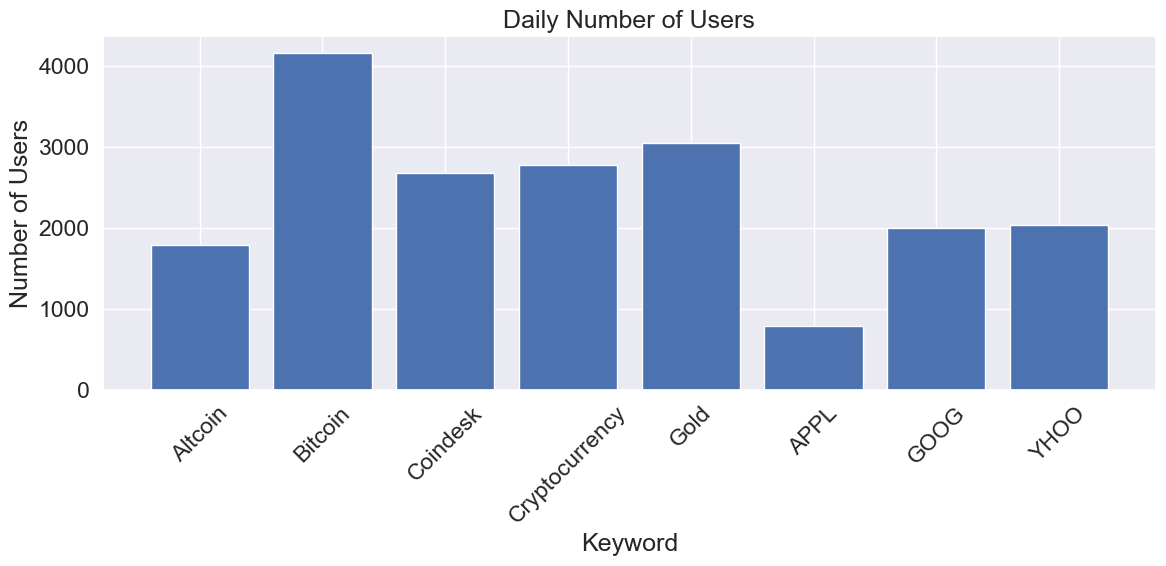

In [84]:
#daily number of users for each keyword
plt.figure(figsize=(12, 6))
plt.bar(user_results.index, user_results['Daily Users'])
plt.title('Daily Number of Users')
plt.xlabel('Keyword')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()